## <center>MIS 665 Business Analytics / Data Mining - Final Project</center>

<center>Bhaskar Aryal</center>

**K-State Honor Code**

> “Any form of collaboration (e.g., copying, working together, getting Jupyter 
notebook from someone, sharing Jupyter notebooks) and unauthorized assistance is considered academi 
cheating and will result in a grade of XF for this class.”



**Your Name:** 

> Bhaskar Aryal

### Modules 
This cell of the notebook has all the modules used throughout the document. 

In [1]:
# import packages 
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import plotly.express as px
from scipy.stats import pearsonr
from IPython.display import Image

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
# import random forest classifier 
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
import pingouin as pg

# K-means clustering 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings("ignore") 

### Section 1 -- Business Intelligence 

#### Part I -- Data Import and Data Quality Assessment  

(a) Download and load data

In [2]:
# Import the dataset "databreachcases-cleaned.csv" using pandas 
# Inspect the dataset 
df = pd.read_csv('databreachcases-cleaned.csv')
df.head(3)

date                                         company state breach  \
0   3/3/2006                                     PayDayOKLLC    NJ   HACK   
1   1/4/2012  SFFireCreditUnionPacifica-CoastsideCreditUnion    CA   PORT   
2  2/18/2012                        BDOUSARubio'sRestaurants    CA   PORT   

   org  records  
0  BSF     88.0  
1  BSF      0.0  
2  BSR      0.0

(b) Perform data quality assessment and show the results (e.g., data types, missing values, summary statistics).

##### (i) Data types

In [3]:
# Show information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


In [4]:
# Alternatively, we can also use: 
df.dtypes

date        object
company     object
state       object
breach      object
org         object
records    float64
dtype: object

- Date, Company, State, Breach, and Org are represented as object (strings)
- Records is a numerical value of float64 type 

##### (ii) Missing values 

In [5]:
# missing values 
df.isnull().sum()

date       0
company    2
state      0
breach     0
org        0
records    0
dtype: int64

- It apperas that there are two missing values in the column "company"

##### (iii) Summary Statistics

In [6]:
#describe the data (basic statistics)
df.describe()

records
count  7.084000e+03
mean   8.648893e+05
std    1.996389e+07
min    0.000000e+00
25%    0.000000e+00
50%    8.080000e+02
75%    5.232500e+03
max    1.370000e+09

##### (iv) Other data understanding efforts

In [7]:
for col in df.columns:
    print(col, df[col].nunique())

date 3065
company 6856
state 65
breach 8
org 7
records 2327


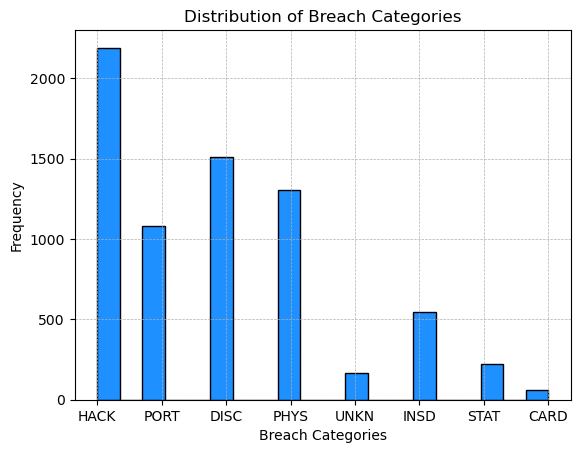

The number of unique value with respect to breach 8
These unique values are respectively:  ['HACK' 'PORT' 'DISC' 'PHYS' 'UNKN' 'INSD' 'STAT' 'CARD']


breach
CARD      63
DISC    1513
HACK    2191
INSD     546
PHYS    1306
PORT    1079
STAT     221
UNKN     165
dtype: int64

In [8]:
# Histogram to see the distribution of breach
plt.hist(df["breach"], color="dodgerblue", edgecolor="black", bins=20, rwidth=1.75)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.xlabel("Breach Categories")  
plt.ylabel("Frequency") 
plt.title("Distribution of Breach Categories")  
plt.show()


# look at the unique values in the variable 
print("The number of unique value with respect to breach", df['breach'].nunique())
print("These unique values are respectively: ", df['breach'].unique())

#group by 
df.groupby("breach").size()

- The distribution indicates that hacing by an outside party or infected by malware is the most common breach with 2191 instances
- Fraud involving debit and credit cards have the least frequency  

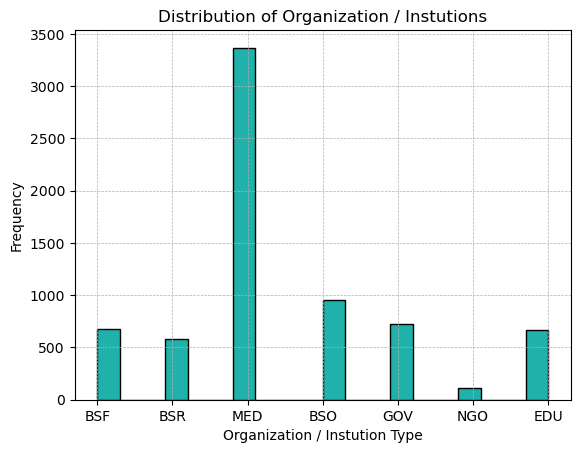

The number of unique value with respect to Instutions 7
These unique values are respectively:  ['BSF' 'BSR' 'MED' 'BSO' 'GOV' 'NGO' 'EDU']


org
BSF     675
BSO     955
BSR     581
EDU     668
GOV     722
MED    3368
NGO     115
dtype: int64

In [9]:
# Histogram to see the distribution of breach
plt.hist(df['org'], color="lightseagreen", edgecolor="black", bins=20, rwidth=1.75)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.xlabel("Organization / Instution Type")  
plt.ylabel("Frequency") 
plt.title("Distribution of Organization / Instutions")  
plt.show()


# look at the unique values in the variable 
print("The number of unique value with respect to Instutions", df['org'].nunique())
print("These unique values are respectively: ", df['org'].unique())

#group by 
df.groupby("org").size()

- Medical instutions face the highest number of data breaches
- NGOs face the least number of data breaches

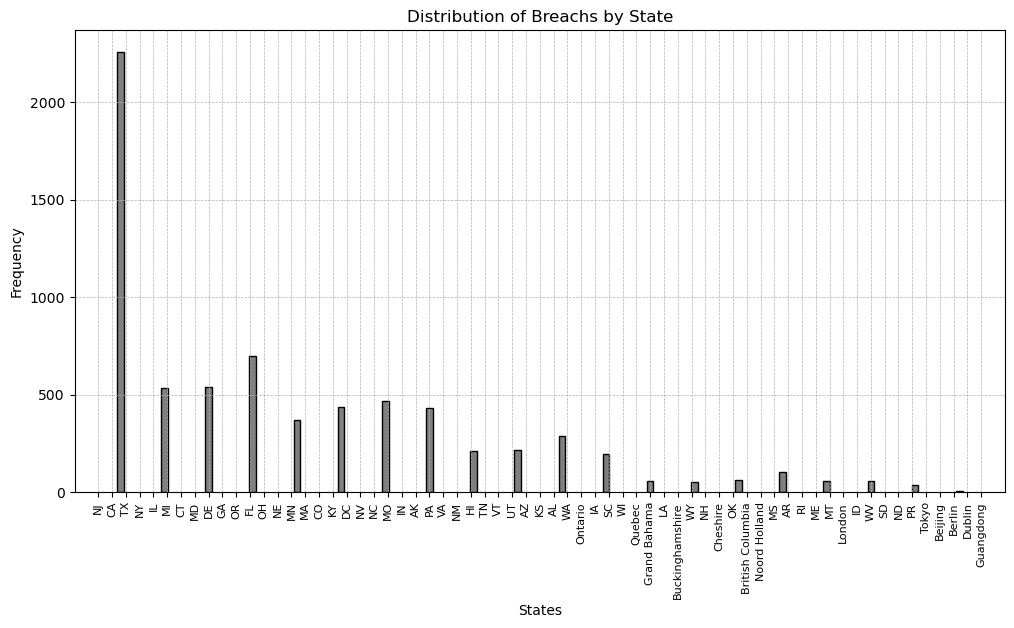

The number of unique value with respect to state 65
These unique values are respectively:  ['NJ' 'CA' 'TX' 'NY' 'IL' 'MI' 'CT' 'MD' 'DE' 'GA' 'OR' 'FL' 'OH' 'NE'
 'MN' 'MA' 'CO' 'KY' 'DC' 'NV' 'NC' 'MO' 'IN' 'AK' 'PA' 'VA' 'NM' 'HI'
 'TN' 'VT' 'UT' 'AZ' 'KS' 'AL' 'WA' 'Ontario' 'IA' 'SC' 'WI' 'Quebec'
 'Grand Bahama' 'LA' 'Buckinghamshire' 'WY' 'NH' 'Cheshire' 'OK'
 'British Columbia' 'Noord Holland' 'MS' 'AR' 'RI' 'ME' 'MT' 'London' 'ID'
 'WV' 'SD' 'ND' 'PR' 'Tokyo' 'Beijing' 'Berlin' 'Dublin' 'Guangdong']


state
AK          24
AL          63
AR          41
AZ         129
Beijing      1
          ... 
VT          31
WA         172
WI          89
WV          27
WY          11
Length: 65, dtype: int64

In [10]:
# Histogram to see the distribution of states
plt.figure(figsize=(12, 6))
plt.hist(df["state"], color="grey", edgecolor="black", bins=20, rwidth=0.15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.xlabel("States")  
plt.ylabel("Frequency") 
plt.title("Distribution of Breachs by State")  
plt.xticks(rotation=90, size = 8) 
plt.show()
# look at the unique values in the variable 
print("The number of unique value with respect to state", df['state'].nunique())
print("These unique values are respectively: ", df['state'].unique())

#group by 
df.groupby("state").size()

- The are some inconsistent values in the the states column.

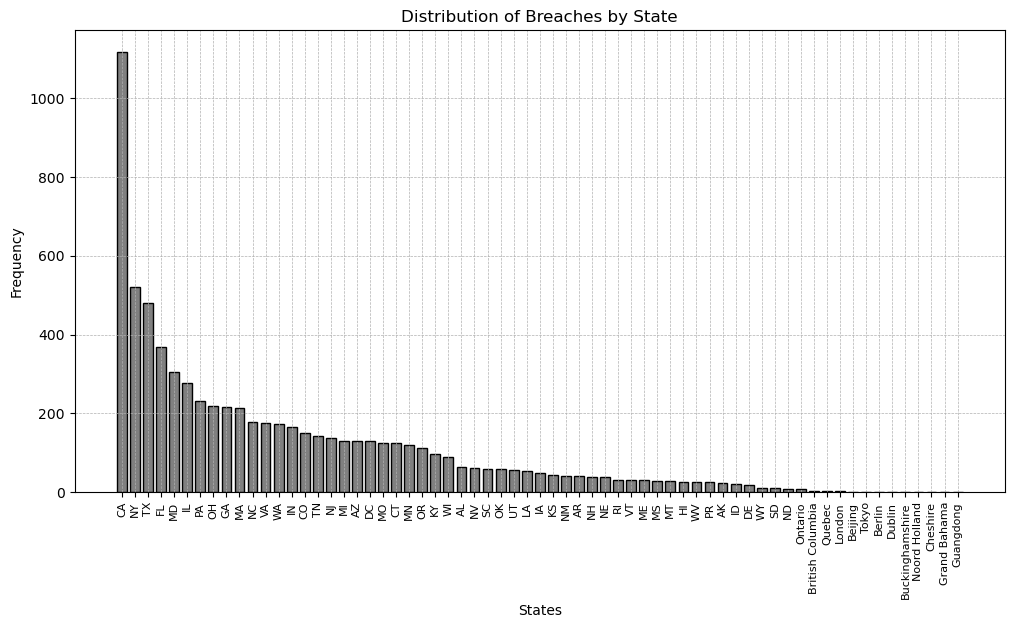

In [11]:
# Alternative better visualization 
# Increase the figure size 
plt.figure(figsize=(12, 6))
plt.bar(df['state'].value_counts().index, df['state'].value_counts().values, color='grey', edgecolor='black', width = 0.75)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("States")
plt.ylabel("Frequency")
plt.title("Distribution of Breaches by State")
plt.xticks(rotation=90, fontsize=8) 
plt.show()


- CA has the largest number of breaches followed by NY and TX

#### Part II--Data Cleaning and Transformation 

##### (a) No space is needed in the column names. Remove space in the column names

In [12]:
# Remove spaces from the column names 
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['date', 'company', 'state', 'breach', 'org', 'records'], dtype='object')

##### (b) Use lowercase for the column names.

In [13]:
# Change the names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'company', 'state', 'breach', 'org', 'records'], dtype='object')

##### (c) Check data types 

In [14]:
# Show information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7084 non-null   object 
 1   company  7082 non-null   object 
 2   state    7084 non-null   object 
 3   breach   7084 non-null   object 
 4   org      7084 non-null   object 
 5   records  7084 non-null   float64
dtypes: float64(1), object(5)
memory usage: 332.2+ KB


##### (d) Modifying date column with Time Series Visualizations 

In [15]:
#(i) The date column needs to be datetime64
# create a new data frame for time series analysis 
ts = df
ts['date'] = pd.to_datetime(ts['date'])   # convert object to datetime

#verify if the date is now a datetime64 format  
ts.dtypes

date       datetime64[ns]
company            object
state              object
breach             object
org                object
records           float64
dtype: object

In [16]:
#(ii) Set the “date” column as the index column. This is required for time-series analysis.
ts = ts.set_index('date')

In [17]:
# check if the date column is now index 
ts.head(2)

company state breach  org  \
date                                                                           
2006-03-03                                     PayDayOKLLC    NJ   HACK  BSF   
2012-01-04  SFFireCreditUnionPacifica-CoastsideCreditUnion    CA   PORT  BSF   

            records  
date                 
2006-03-03     88.0  
2012-01-04      0.0

In [18]:
# see the index ... data is organized by these dates ... this is a time series data
ts.index

DatetimeIndex(['2006-03-03', '2012-01-04', '2012-02-18', '2012-02-22',
               '2012-03-12', '2012-03-14', '2012-03-19', '2012-03-19',
               '2012-03-23', '2012-03-31',
               ...
               '2009-12-15', '2009-12-11', '2009-11-23', '2009-11-20',
               '2009-11-20', '2009-11-20', '2009-11-20', '2009-11-20',
               '2009-11-17', '2009-10-28'],
              dtype='datetime64[ns]', name='date', length=7084, freq=None)

In [19]:
#(iii) Sort the data by the index
ts = ts.sort_index()
ts.index

DatetimeIndex(['2005-01-10', '2005-01-18', '2005-01-22', '2005-02-12',
               '2005-02-18', '2005-02-25', '2005-02-25', '2005-03-08',
               '2005-03-10', '2005-03-11',
               ...
               '2019-07-19', '2019-07-23', '2019-08-05', '2019-08-06',
               '2019-08-15', '2019-08-19', '2019-08-26', '2019-09-18',
               '2019-10-03', '2019-10-25'],
              dtype='datetime64[ns]', name='date', length=7084, freq=None)

##### (e) Check the number of rows and columns

In [20]:
n_rows, n_columns = ts.shape
print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 7084
Number of columns: 5


##### (f) If any other data cleaning and transformation are deemed necessary, feel free to do that (remember,this is an open-ended project). However, explain what you’re doing (and why you’re doing it) so that the instructor(s) can evaluate your project.

We inspected missing values in the data cleaning section. However, we have no handeled the missing values yet. There are many ways to handle missing value which include but are not limited to: 
- Dropping the observation with missin values
- Replacing the missing value with mean, medain or mode
- Performing a suitable interpolation to replace the missing value

In our case, we will move ahead by dropping the rows with missing values, so that no bias is introduced in the data

In [21]:
# check the missng values in the ts dataframe
ts.isnull().sum()

company    2
state      0
breach     0
org        0
records    0
dtype: int64

In [22]:
# Drop missing values 
ts = ts.dropna()
n_rows, n_columns = ts.shape
print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 7082
Number of columns: 5


- The new dataframe show two number of rows less than the original data frame  

##### We will now handle inconsistent values in the data frame 

In the "states" column, there are 65 unique values. Upon inspection, we observe that there are some cities and states outside of the US. We will remove these inconsistent values by filtering the data for US states only. 

In [23]:
# make a list of US states 
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

In [24]:
# Filter data by US states 
ts_filtered = ts[ts['state'].isin(us_states)]
ts_filtered.shape

(7031, 5)

- We removed 51 observations that were not related to US states 

In [25]:
# lets inspect the filtered dataframe 
ts_filtered.head()

company state breach  org  \
date                                                                        
2005-01-10                        GeorgeMasonUniversity    VA   HACK  EDU   
2005-01-18               UniversityofCaliforniaSanDiego    CA   HACK  EDU   
2005-01-22                 UniversityofNorthernColorado    CO   PORT  EDU   
2005-02-12  ScienceApplicationsInternationalCorp.(SAIC)    CA   STAT  BSO   
2005-02-18                  UniversityofChicagoHospital    IL   INSD  MED   

            records  
date                 
2005-01-10  32000.0  
2005-01-18   3500.0  
2005-01-22  15790.0  
2005-02-12  45000.0  
2005-02-18     85.0

#### Part III--Business Intelligence 

#### Questions
(a) You must answer the questions below using data analytics techniques (e.g., pivot table, data 
visualization, descriptive statistics). Each question needs to be copied and pasted into your Jupyter 
notebook. You must use exactly the same numbering (otherwise, your grade will be lowered). Showing 
a chart or graph is not enough. Based on the chart or graph, you must provide a statement (e.g., 
“Hacking is the most popular data breach type”)

##### 1. Lets start with some basic questions

##### (a) What is the sum of total records breached, according to the data?

In [26]:
print('The sum of total records breached is:', ts_filtered['records'].sum())

The sum of total records breached is: 6075744246.0


(b) According to the data, what is the average number of total records breached?

In [27]:
print('The average number of total records breached is:', round(ts_filtered['records'].mean(), 1))

The average number of total records breached is: 864136.6


(c) What are the ten most damaging cases of data breaches in terms of the number of total records 
breached? Name the ten organizations. 

In [28]:
# sort the data by records in ascending order
top_ten_breaches = ts_filtered.sort_values(by = 'records', ascending = False).head(10)

# select the top ten orgs
print("The ten organizations with the most damaging data breaches are:")
print(top_ten_breaches['company'].tolist())

The ten organizations with the most damaging data breaches are:
['RiverCityMedia', 'Yahoo', 'FriendFinder', 'Exactis', 'MarriottInternational', 'Epsilon', 'DeepRootAnalytics', 'LinkedIn.com', 'UnderArmour', 'EquifaxCorporation']


##### 2. What types of data breaches are more common than others? Which data breach type is most common?

##### a. In terms of the number of incidents (Hint: each row in the dataset represents one incident case)

In [29]:
# lets find out the frequency of each breach type 
data_breach_frequency = ts_filtered['breach'].value_counts()
print("Frequency of each type of data breach:")
print(data_breach_frequency)

Frequency of each type of data breach:
breach
HACK    2166
DISC    1504
PHYS    1290
PORT    1079
INSD     546
STAT     219
UNKN     164
CARD      63
Name: count, dtype: int64


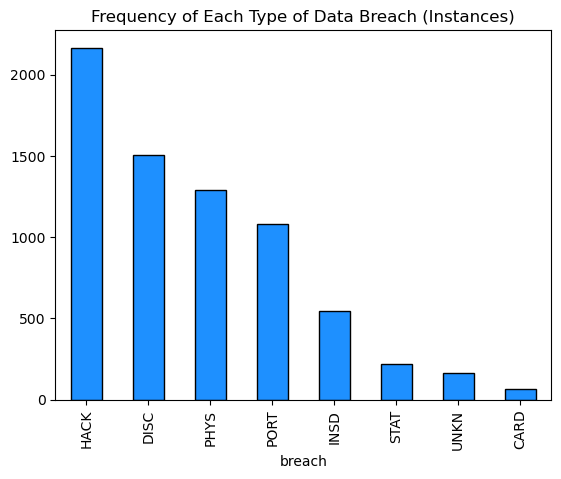

In [30]:
# Lets do some visualizatoin 
data_breach_frequency.plot(kind='bar', edgecolor = 'black', facecolor = 'dodgerblue')
plt.title('Frequency of Each Type of Data Breach (Instances)')
plt.show()

In [31]:
# Identify the most common data breach type
most_common_breach = data_breach_frequency.idxmax()
most_common_breach_count = data_breach_frequency.max()
# print
print(f"The most common type of data breach in terms of number of incidents is '{most_common_breach}' with {most_common_breach_count} occurrences.")

The most common type of data breach in terms of number of incidents is 'HACK' with 2166 occurrences.


##### (b) In terms of the number of total records (Hint: each incident causes a different degree of harm to organizations in terms of “Total Records”)

In [32]:
# breach by total records 
data_breach_total = ts_filtered.groupby('breach')['records'].sum().sort_values(ascending = False)
data_breach_total

breach
HACK    3.327818e+09
DISC    2.405588e+09
PORT    1.762578e+08
INSD    8.257934e+07
UNKN    3.193553e+07
PHYS    2.904632e+07
STAT    1.531656e+07
CARD    7.202086e+06
Name: records, dtype: float64

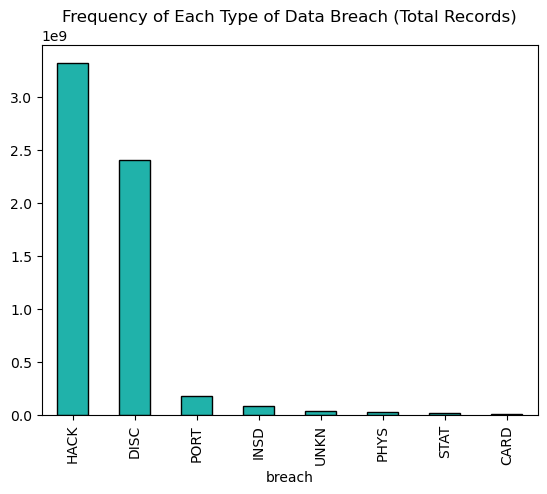

In [33]:
# Lets do some visualizatoin 
data_breach_total.plot(kind='bar', edgecolor = 'black', facecolor = 'lightseagreen')
plt.title('Frequency of Each Type of Data Breach (Total Records)')
plt.show()

In [34]:
# Identify the most common data breach type
most_common_breach = data_breach_total.idxmax()
most_common_breach_count = data_breach_total.max()
# print
print(f"The most common type of data breach in terms of number of incidents is '{most_common_breach}' with {most_common_breach_count} total records.")

The most common type of data breach in terms of number of incidents is 'HACK' with 3327818183.0 total records.


##### 3. What types of organizations are more likely to have a data breach? Which organization type has the highest number of data breaches?

##### (a) In terms of number of incidents

In [35]:
# breach by organization type - most likely using group by 
data_breach_org = ts_filtered.groupby('org')['records'].size().sort_values(ascending = False)
data_breach_org

org
MED    3339
BSO     939
GOV     722
BSF     670
EDU     668
BSR     578
NGO     115
Name: records, dtype: int64

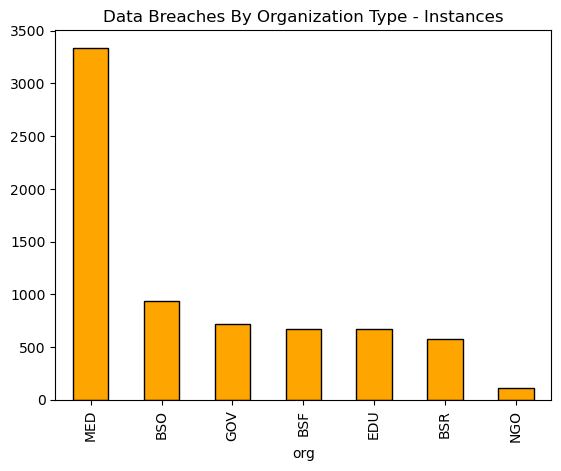

In [36]:
# Lets do some visualizatoin 
data_breach_org.plot(kind='bar', edgecolor = 'black', facecolor = 'orange')
plt.title('Data Breaches By Organization Type - Instances') 
plt.show()

In [37]:
#organization type with the highest number of data breaches
most_breaches_org = data_breach_org.idxmax()
most_breaches_org_count = data_breach_org.max()

print(f"The organization type with the most data breaches is '{most_breaches_org}' with {most_breaches_org_count} incidents.")

The organization type with the most data breaches is 'MED' with 3339 incidents.


##### (b) In terms of the number of total records

In [38]:
# breach by organization type - most likely using group by 
data_breach_org_total = ts_filtered.groupby('org')['records'].sum().sort_values(ascending = False)
data_breach_org_total

org
BSO    3.901796e+09
BSR    1.134229e+09
BSF    6.261128e+08
GOV    2.250789e+08
MED    1.179527e+08
EDU    6.213972e+07
NGO    8.434746e+06
Name: records, dtype: float64

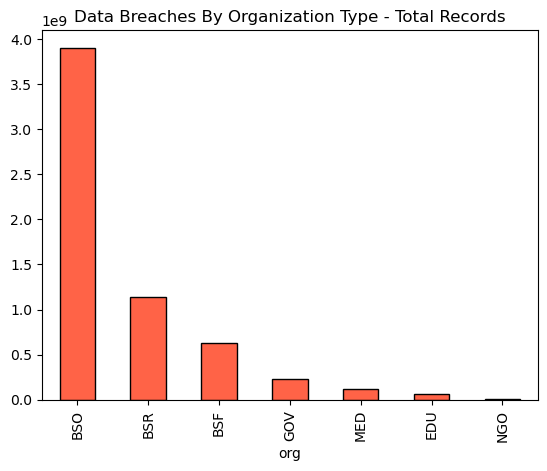

In [39]:
# Lets do some visualizatoin 
data_breach_org_total.plot(kind='bar', edgecolor = 'black', facecolor = 'tomato')
plt.title('Data Breaches By Organization Type - Total Records') 
plt.show()

In [40]:
#organization type with the highest number of data breaches
most_breaches_org = data_breach_org_total.idxmax()
most_breaches_org_count = data_breach_org_total.max()

print(f"The organization type with the most data breaches is '{most_breaches_org}' with {most_breaches_org_count} total records.")

The organization type with the most data breaches is 'BSO' with 3901796387.0 total records.


##### (c) Which organization types appear to be the target of data breaches?

In [41]:
# Based on instances 
print("Based on number of instances, the following organizations appear to be the top three targets of data breaches:", data_breach_org.head(3))

Based on number of instances, the following organizations appear to be the top three targets of data breaches: org
MED    3339
BSO     939
GOV     722
Name: records, dtype: int64


In [42]:
# Based on total records
print("Based on number of instances, the following organizations appear to be the top three targets of data breaches:", data_breach_org_total.head(3))

Based on number of instances, the following organizations appear to be the top three targets of data breaches: org
BSO    3.901796e+09
BSR    1.134229e+09
BSF    6.261128e+08
Name: records, dtype: float64


##### 4. States & data breaches

##### (a) Which US states are more likely to have data breaches? 

In [43]:
# Breach and states 
data_breach_state = ts_filtered.groupby('state')['records'].size().sort_values(ascending = False)
data_breach_state

state
CA    1116
NY     521
TX     480
FL     368
MD     306
IL     277
PA     232
OH     220
GA     216
MA     214
NC     178
VA     175
WA     172
IN     166
CO     151
TN     142
NJ     138
MI     131
AZ     129
DC     128
MO     125
CT     124
MN     119
OR     113
KY      97
WI      89
AL      63
NV      61
SC      59
OK      58
UT      56
LA      55
IA      50
KS      44
NM      41
AR      41
NH      39
NE      38
RI      32
VT      31
ME      30
MS      29
MT      28
HI      27
WV      27
AK      24
ID      22
DE      18
SD      11
WY      11
ND       9
Name: records, dtype: int64

In [44]:
print("The top five states most likely to have data breaches are:", data_breach_state.head(5))

The top five states most likely to have data breaches are: state
CA    1116
NY     521
TX     480
FL     368
MD     306
Name: records, dtype: int64


In [45]:
# Visualizaton 
# change the output to dataframe 
data_breach_df = data_breach_state.reset_index(name='count')
data_breach_df.columns = ['State', 'Number of Breaches']
data_breach_df.head(2) 

State  Number of Breaches
0    CA                1116
1    NY                 521

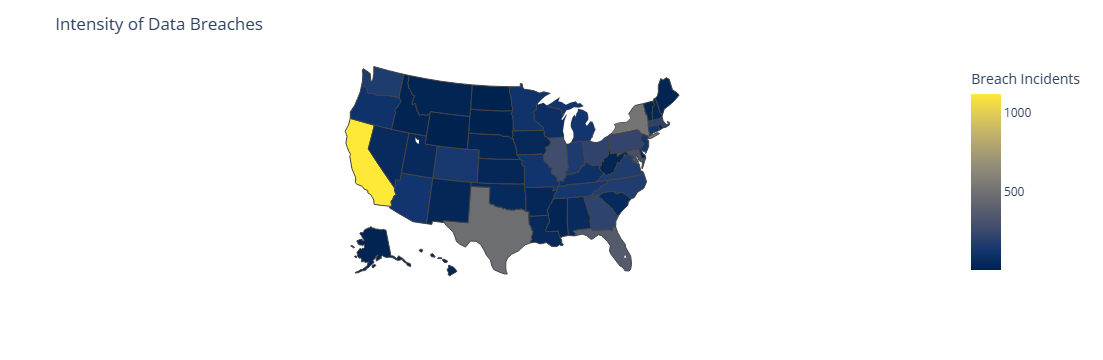

In [46]:
# Visualization for 2018 using plotly
fig = px.choropleth(
    data_breach_df, 
    locations='State', 
    locationmode='USA-states', 
    color='Number of Breaches', 
    hover_name='State', 
    hover_data={'Number of Breaches': True, 'State': False},
    color_continuous_scale=px.colors.sequential.Cividis,  
    scope="usa",  
    labels={'Number of Breaches':'Breach Incidents'})

fig.update_layout(
    title_text = 'Intensity of Data Breaches', geo_scope='usa')

# Show the plot
fig.show()

##### (b) What are the top three states regarding the number of data breaches in 2018?

In [47]:
# filter the data for year 2018 
data_2018 = ts_filtered[ts_filtered.index.year == 2018]

In [48]:
# use groupby state 
data_breach_state = data_2018.groupby('state').size().sort_values(ascending=False)
data_breach_state

state
CA    78
TX    26
MA    21
FL    18
PA    16
NY    14
MD    13
NC    12
VA    12
IL    12
IN    12
OH    10
OR    10
NJ     9
WA     9
TN     8
MO     8
AZ     8
GA     8
KY     6
CT     6
MI     6
NV     5
NM     5
CO     4
KS     4
ME     4
WI     4
ID     3
MS     3
MN     3
RI     2
UT     2
WV     2
AK     2
MT     2
AL     2
IA     2
DC     2
AR     2
WY     2
NH     1
NE     1
SC     1
HI     1
DE     1
dtype: int64

In [49]:
print("The top three states regardng the number of data breaches in 2018 are:", data_breach_state.head(3))

The top three states regardng the number of data breaches in 2018 are: state
CA    78
TX    26
MA    21
dtype: int64


In [50]:
# visualization 
data_breach_df = data_breach_state.reset_index(name='count')
data_breach_df.columns = ['State', 'Number of Breaches']
data_breach_df.head(2) 

State  Number of Breaches
0    CA                  78
1    TX                  26

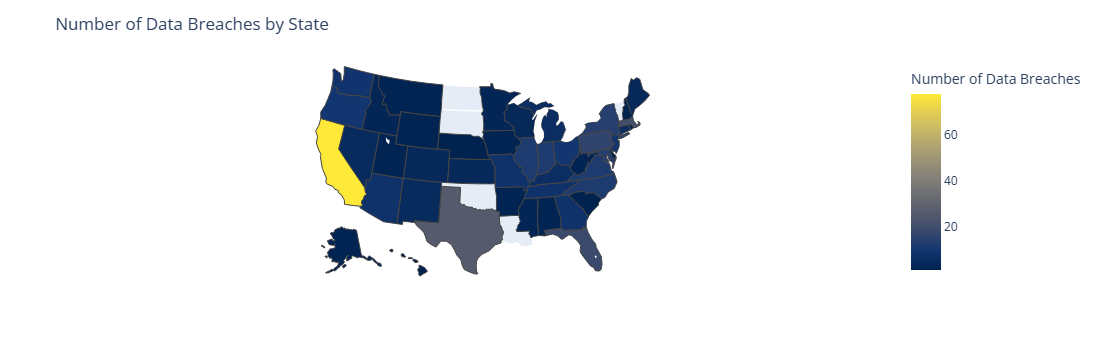

In [51]:
# Visualization for 2018 using plotly
fig = px.choropleth(
    data_breach_df, 
    locations='State', 
    locationmode='USA-states', 
    color='Number of Breaches', 
    hover_name='State', 
    hover_data={'Number of Breaches': True, 'State': False},
    color_continuous_scale=px.colors.sequential.Cividis,  
    scope="usa",  
    labels={'Number of Breaches':'Number of Data Breaches'})

fig.update_layout(
    title_text = 'Number of Data Breaches by State',
    geo_scope='usa')

# Show the plot
fig.show()

##### Relationships between organizations, state, and data breaches 

##### 5. Organizations & Data breaches

##### a. Which organization type is more vulnerable to “Hackers”?

In [52]:
# filter the data by Breach type (= Hack) and group it by org type 
vulnerability = ts_filtered[ts_filtered['breach']=='HACK'].groupby('org').size().sort_values(ascending = False)
vulnerability

org
MED    747
BSO    556
BSR    280
EDU    223
BSF    185
GOV    139
NGO     36
dtype: int64

In [53]:
print("The most vulnerable organization type to Hacking is:", vulnerability.idxmax())

The most vulnerable organization type to Hacking is: MED


##### b. What is the most popular type of data breach in education?

In [54]:
# filter the data for org type (=EDU) and groupby
EDU_breach = ts_filtered[ts_filtered['org']=='EDU'].groupby('breach').size().sort_values(ascending = False)
EDU_breach

breach
HACK    223
DISC    189
PORT    107
PHYS     56
UNKN     37
STAT     31
INSD     24
CARD      1
dtype: int64

In [55]:
print("The most popular type of data breach in Education is:", EDU_breach.idxmax())

The most popular type of data breach in Education is: HACK


##### c. What is the most popular data breach type for medical organizations?

In [56]:
# filter the data for org type (=EDU) and groupby
MED_breach = ts_filtered[ts_filtered['org']=='MED'].groupby('breach').size().sort_values(ascending = False)
MED_breach

breach
PHYS    976
DISC    815
HACK    747
PORT    439
INSD    227
STAT    100
UNKN     34
CARD      1
dtype: int64

In [57]:
print("The most popular type of data breach in Education is:", MED_breach.idxmax())

The most popular type of data breach in Education is: PHYS


##### 6. US states & data breaches

##### a. Which state is more vulnerable to “Hackers”?

In [58]:
# filter the data and goupy by states 
State_hackers = ts_filtered[ts_filtered['breach']=='HACK'].groupby('state').size().sort_values(ascending = False)
State_hackers

state
CA    412
NY    153
TX    139
MD    119
FL     96
IL     80
PA     69
GA     65
MA     64
VA     62
WA     59
OH     51
NJ     51
DC     50
MO     44
IN     43
MI     40
NC     40
CT     39
CO     39
AZ     34
MN     34
OR     31
TN     28
WI     27
NV     22
KY     22
UT     20
IA     20
NH     19
NE     16
AL     15
ME     15
VT     14
OK     13
AR     12
LA     11
SC     11
AK     10
KS     10
ID      9
DE      9
HI      8
NM      8
MT      8
MS      6
RI      5
WV      5
SD      4
ND      3
WY      2
dtype: int64

In [59]:
print("The state most vulnerable to hackers is:", State_hackers.idxmax())

The state most vulnerable to hackers is: CA


##### b. Which state is more vulnerable to “CARD”?

In [60]:
# filter the data and goupy by states 
State_card = ts_filtered[ts_filtered['breach']=='CARD'].groupby('state').size().sort_values(ascending = False)
State_card

state
CA    12
NY     8
FL     6
IL     3
MN     3
OH     3
AZ     3
TX     3
MI     2
GA     2
MA     2
WA     2
PA     2
UT     2
AR     1
VA     1
TN     1
NJ     1
OK     1
NV     1
NC     1
MO     1
ME     1
WI     1
dtype: int64

In [61]:
print("The state most vulnerable to CARD frauds is:", State_card.idxmax())

The state most vulnerable to CARD frauds is: CA


##### Organizations, data breaches & time

##### 7. Visualize data breaches over time (time series analysis – line chart). 

##### a. Visualize a time series first.

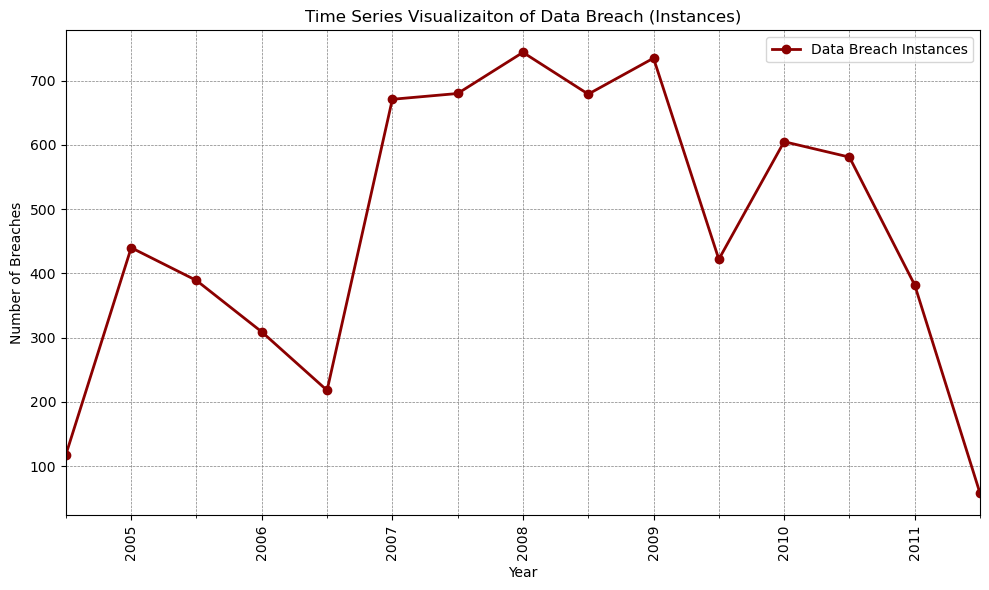

In [62]:
# Lets see how a bar chart looks 
# figsize
plt.figure(figsize=(10, 6))

# Resample the data yearly
yearly_breach_counts = ts_filtered.resample('Y').size()
yearly_breach_sum = ts_filtered.resample('Y').sum()

yearly_breach_counts.plot(kind='line', color='darkred', label='Data Breach Instances', marker = "o", linewidth = 2)

# Set the title and labels
plt.title('Time Series Visualizaiton of Data Breach (Instances)') 
plt.xlabel('Year')
plt.ylabel('Number of Breaches')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# use this to show year only in x axis 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(yearly_breach_counts.index.year[pos])))
# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add legend 
plt.legend()
plt.tight_layout()  
plt.show()

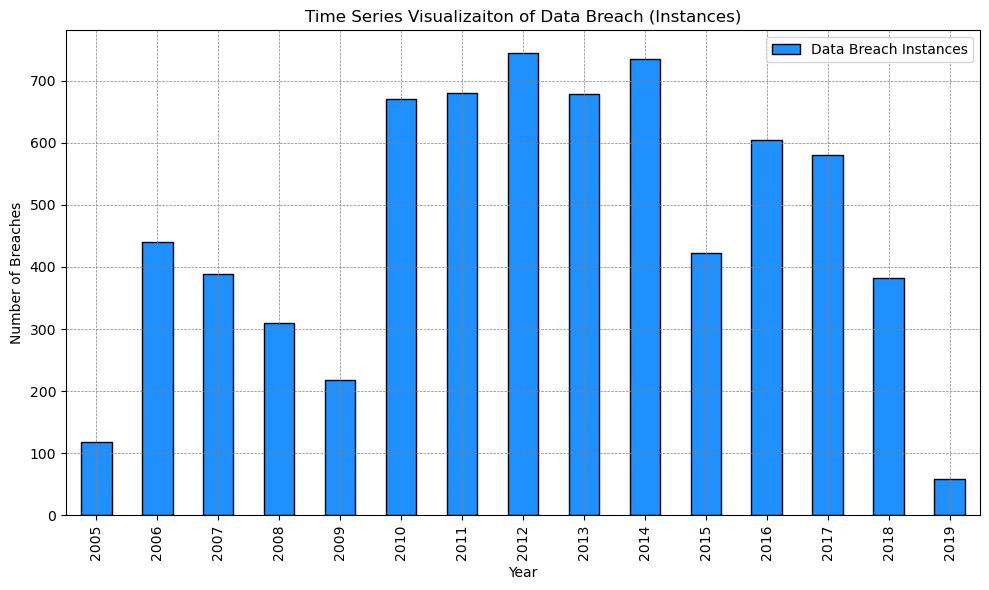

In [63]:
# Lets see how a bar chart looks 
# figsize
plt.figure(figsize=(10, 6))

# Resample the data yearly
yearly_breach_counts = ts_filtered.resample('Y').size()
yearly_breach_sum = ts_filtered.resample('Y').sum()

yearly_breach_counts.plot(kind='bar', color='dodgerblue', edgecolor='black', label='Data Breach Instances')

# Set the title and labels
plt.title('Time Series Visualizaiton of Data Breach (Instances)') 
plt.xlabel('Year')
plt.ylabel('Number of Breaches')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# use this to show year only in x axis 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(yearly_breach_counts.index.year[pos])))

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add legend 
plt.legend()
plt.tight_layout()  
plt.show()

<Figure size 1000x600 with 0 Axes>

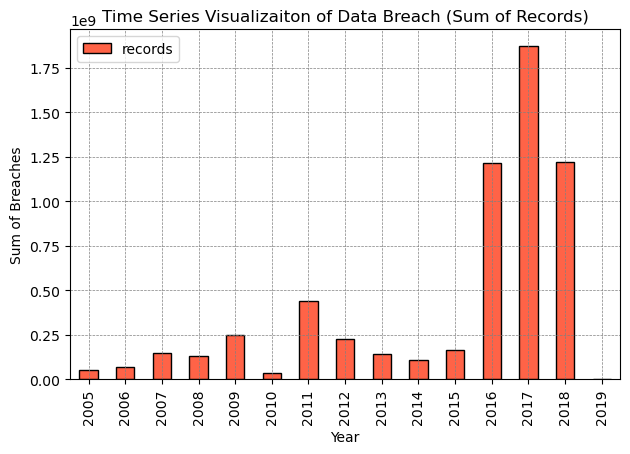

In [64]:
# Visualization of sum of records over years
plt.figure(figsize=(10, 6))

# Resample the data yearly
yearly_breach_sum = ts_filtered.resample('Y').sum()

yearly_breach_sum.plot(kind='bar', color='tomato', edgecolor='black', label='records')

# Set the title and labels
plt.title('Time Series Visualizaiton of Data Breach (Sum of Records)') 
plt.xlabel('Year')
plt.ylabel('Sum of Breaches')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# use this to show year only in x axis 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(yearly_breach_counts.index.year[pos])))
# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add legend 
plt.legend()
plt.tight_layout()  
plt.show()

##### b. How many breaches per year?

In [65]:
# Resample and count 
yearly_breach_counts = ts_filtered.resample('Y').count()
yearly_breach_counts['breach'].to_frame()

breach
date              
2005-12-31     118
2006-12-31     440
2007-12-31     389
2008-12-31     309
2009-12-31     218
2010-12-31     671
2011-12-31     680
2012-12-31     744
2013-12-31     679
2014-12-31     735
2015-12-31     422
2016-12-31     605
2017-12-31     581
2018-12-31     382
2019-12-31      58

##### 8. Any relationship between time and data breach type? 

##### a. Has any data breach type increased over time?

In [66]:
# Resample by year and count breaches by type
yearly_breach_counts_type = ts_filtered.groupby('breach').resample('Y').size().unstack(fill_value=0)
#Transpose
yearly_breach_counts_type = yearly_breach_counts_type.T

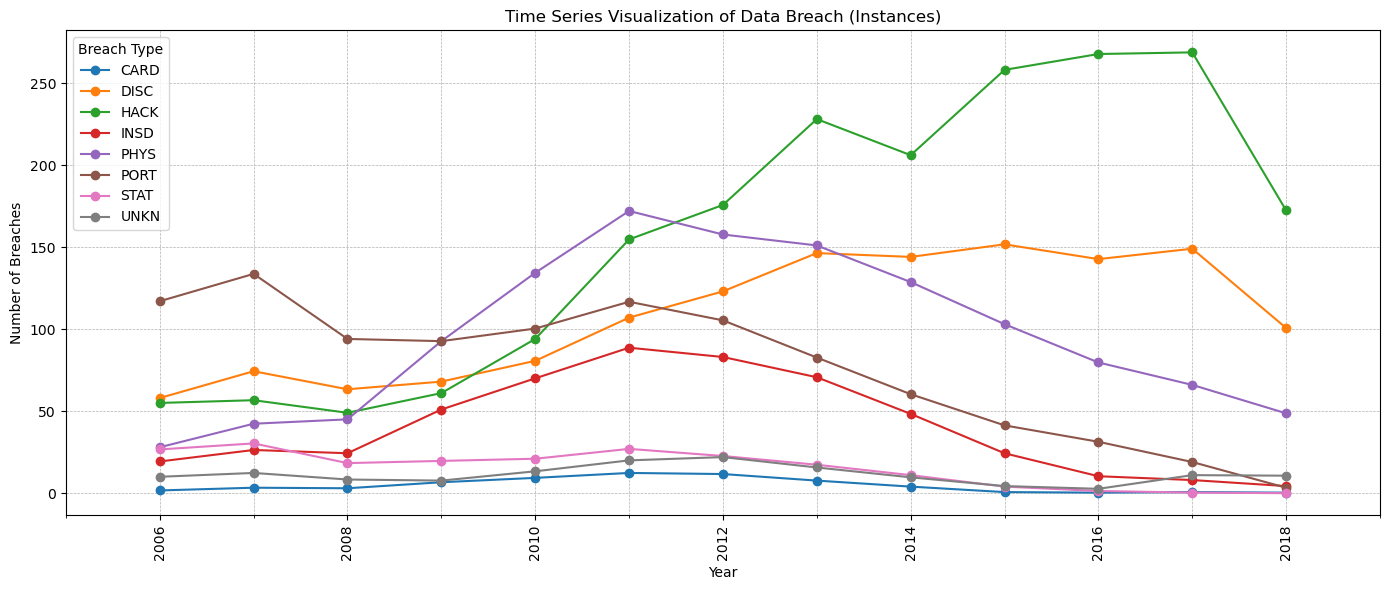

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))

# moving average
moving_average_data = yearly_breach_counts_type.rolling(window=3, center=True).mean()

# Plotting the smoothed data
moving_average_data.plot(kind='line', marker='o', ax=ax)

# Set titles and labels
ax.set_title('Time Series Visualization of Data Breach (Instances)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Breaches')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(title='Breach Type')
plt.tight_layout()
plt.show()


- *HACK* and *DISC* type of data breach have increased over time
- *PHYS*, *PORT*, *INSD* shows decrease over time notably after 2010
- *CARD*, *STAT* and *UKN* seem to be more or less similar

##### Multiple data breaches (repeating incidents)

##### 9. Organizations that have experienced repeated incidents

##### a. How many organizations (“company”) have multiple data breaches (more than one data breach since 2005)? 

In [68]:
# filter data to select after 2005 
data_2005_after = ts_filtered[ts_filtered.index.year > 2005]

In [69]:
# Count the occurrences of each company
company_counts = df['company'].value_counts()

In [70]:
# Multiple breaches
multiple_breaches = company_counts[company_counts > 1]
print("Number of companies with with multiple breaches:", multiple_breaches.count())

Number of companies with with multiple breaches: 185


##### (b) This question extends the previous question a. What organizational or institutional types are closely associated with those organizations having multiple data breaches (more than one data breach between 2005 and 2019)?

In [71]:
# since no data after 2019 we will use the earlier filtered data
company_org_counts = data_2005_after.groupby(['company', 'org']).size()

# Find companies with multiple breaches
multiple_breaches = company_org_counts[company_org_counts.groupby(level=0).transform('count') > 1] # level = 0 is for company grouping i.e first index

org_counts = multiple_breaches.reset_index().groupby('org').size()

# Print the result
print("Org types closely associated with organizations having multiple data breaches since 2005:")
print(org_counts.sort_values(ascending = False))

Org types closely associated with organizations having multiple data breaches since 2005:
org
MED    54
BSO    25
BSR    24
BSF    23
EDU     4
NGO     2
GOV     1
dtype: int64


- MED, BSO and BSR are the top three org types that have companies hit by multiple data breach cases

##### Kansas & your questions (Drill-down on one data breach type, one organization type, or one time period)

##### 10. Kansas & your questions (be creative to draw an insightful story from the data!)

##### a. What are Kansas's top five data breach cases regarding the number of records?

In [72]:
# fiter data by state KS 
df_KS = ts_filtered[ts_filtered['state']=="KS"]
df_KS.head()

company state breach  org  records
date                                                                       
2006-01-20  UniversityofKansas(KansasUniversity)    KS   DISC  EDU   9200.0
2006-07-18           U.S.DepartmentofAgriculture    KS   PORT  GOV    350.0
2006-08-01                WichitaStateUniversity    KS   HACK  EDU   2000.0
2007-01-28            SalinaRegionalHealthCenter    KS   PORT  MED   1100.0
2007-09-19                      KansasUniversity    KS   PHYS  EDU      0.0

In [73]:
# top five cases of data breach in Kansas 
df_KS_breach = df_KS.sort_values(by = "records", ascending = False).head(5)
print("Kansas's top five data breach cases regarding the number of records:")
df_KS_breach

Kansas's top five data breach cases regarding the number of records:


company state breach  \
date                                                                         
2017-07-21                         KansasDepartmentofCommerce    KS   HACK   
2017-03-27                           America'sJobLinkAlliance    KS   HACK   
2016-02-26                              ValleyHopeAssociation    KS   PORT   
2013-10-10         CityofWichita-ElectronicProcurementWebsite    KS   HACK   
2018-03-08  KansasDepartmentforAgingandDisabilityServices(...    KS   HACK   

            org    records  
date                        
2017-07-21  GOV  5500000.0  
2017-03-27  BSO  2100000.0  
2016-02-26  MED    52076.0  
2013-10-10  GOV    29000.0  
2018-03-08  GOV    11000.0

##### b. What is the trend of data breaches in Kansas since 2015?

In [74]:
# filter data to select after 2005 
df_KS_2015 = ts_filtered[ts_filtered.index.year >= 2015]
df_KS_2015.head()

company state breach  org  records
date                                                       
2015-01-01  SummitFinancialGroup    CA   DISC  BSF    662.0
2015-01-01        UnitedAirlines    IL   HACK  BSO      0.0
2015-01-01    FastForwardAcademy    FL   HACK  EDU      0.0
2015-01-02            Chic-Fil-A    GA   HACK  BSO      0.0
2015-01-05              mdINRLLC    FL   DISC  MED   1859.0

In [75]:
# resample the data 
df_KS_breach_trend = df_KS_2015.resample('Y').size()

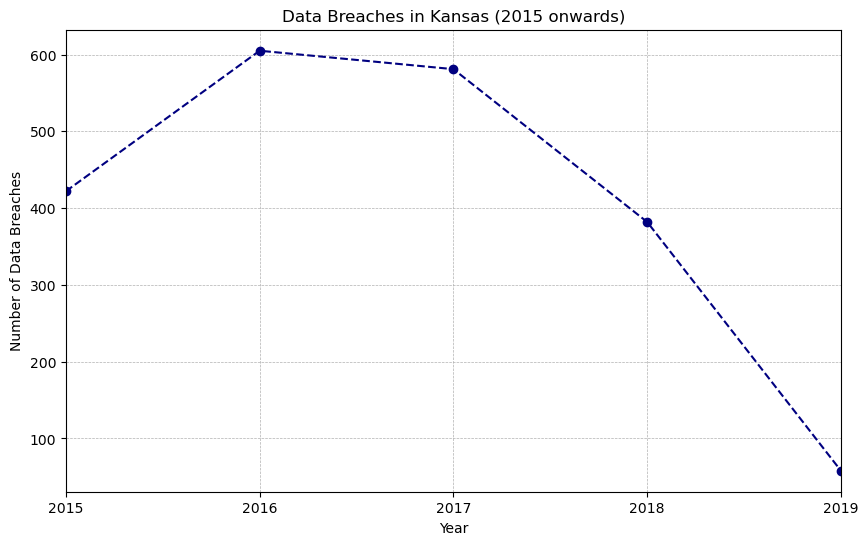

In [76]:
# Plot the trend using a line plot
plt.figure(figsize=(10, 6))
df_KS_breach_trend.plot(marker='o', linestyle='--', color = "navy")
plt.title('Data Breaches in Kansas (2015 onwards)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Data Breaches')
plt.grid(True)
plt.show()

- There is a decilining trend of data breach in KS 2015 onwards

##### (c) What is the most popular type of data breach in KS since 2015

In [77]:
df_KS_breach_popular = df_KS_2015.groupby('breach')['records'].size().sort_values(ascending = False)
df_KS_breach_popular

breach
HACK    988
DISC    584
PHYS    300
PORT     95
UNKN     38
INSD     37
STAT      4
CARD      2
Name: records, dtype: int64

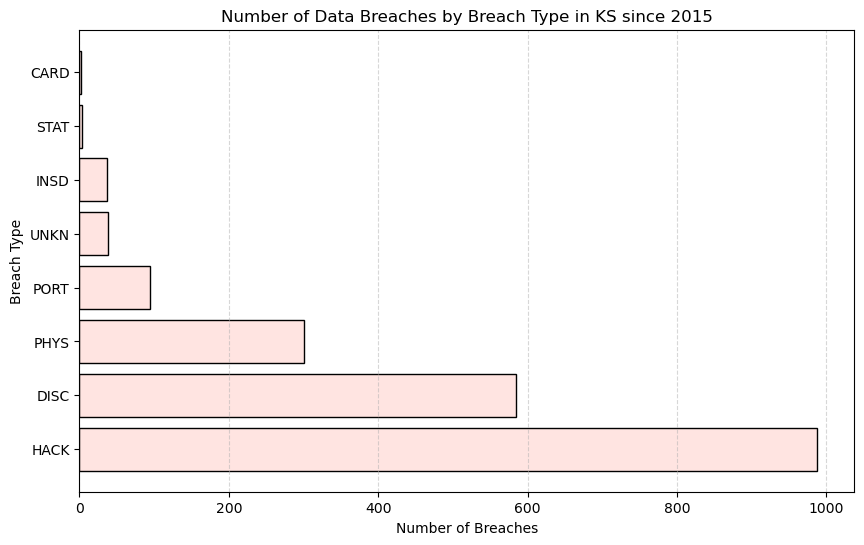

In [78]:
# Create a horizontal bar chart visualization 
plt.figure(figsize=(10, 6))
plt.barh(df_KS_breach_popular.index, df_KS_breach_popular.values, color='mistyrose', edgecolor = 'black')
plt.xlabel('Number of Breaches')
plt.ylabel('Breach Type')
plt.title('Number of Data Breaches by Breach Type in KS since 2015')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [79]:
print("The most popular type of data breach in Kansas since 2015 is:", df_KS_breach_popular.idxmax())

The most popular type of data breach in Kansas since 2015 is: HACK


#### Part IV--Story Telling 

##### 4. Provide your analysis's three most surprising/interesting findings.

- The instances of data breach are higher between 2010 and 2014, however, if we analyze by the sum of records 2016, 2017 and 2018 have higher record. The highest being for the year 2017.
- For the year 2018, North Dokota, South Dakota and Louisiana did not have any case of data breach. 
- Physical damage/loss ( Includes paper documents that are lost, discarded, or stolen) i.e. is the most popular data breach in Health Care and Medical Service sector )

### Section 2 -- Machine Learning 

#### Part I -- Exploratory Data Analysis (Correlation Analysis)

##### Download and load data

In [80]:
# Import the dataset "movie_metadata" using pandas 
# Inspect the dataset 
df = pd.read_csv('movie_metadata.csv', encoding = 'utf-8')
df.head(3)

color   director_name  num_critic_for_reviews  duration  \
0  Color   James Cameron                   723.0     178.0   
1  Color  Gore Verbinski                   302.0     169.0   
2  Color      Sam Mendes                   602.0     148.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  

[3 rows x 28 columns]

In [81]:
# lets inspect the variables data types along with column names  
df.info()
# alternatively 
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

- The dataset has a mix of numerical and categorical (or character) variables. For instance, color, language, country are categorical variables; whereas duration, gross, budget etc. are numerical variables. 

In [82]:
# Check the shape of the data 
# The number of rows tells us how many movies are in the dataset 
df.shape

(5043, 28)

##### Remove unnecessary columns. Not all columns, such as movie titles and director names, are required for machine learning. Therefore, it’s important to exercise judgment when deciding which columns to keep. Write a markdown explaining the reasoning behind removing certain columns.

In [83]:
# Drop duplicate informaton from the dataset 
df = df.drop_duplicates()
df.shape

(4998, 28)

In [84]:
# remove unnecessary columns and reduce the dimensionality 
df.drop(['director_name', 'movie_title', 'movie_imdb_link', 'actor_2_name', 'actor_3_name', 'plot_keywords'], axis=1, inplace = True)

In [85]:
# check the columns after dropping the columns 
print(df.shape)
print(df.columns)

(4998, 22)
Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


Variables-- 'director_name', 'movie_title', 'movie_imdb_link', 'actor_2_name', 'actor_3_name', and 'plot_keywords' were remove from the dataset for the following reasons:
- Unless specifically analyzing the impact of directors on film success, name of the director is an extra informatoin.
- Movie titles  and movie_imdb_link do not provide any predictive values for IMDB score.
- Names of supporting actors might be less influential when main actors is already included, and it is too specific information.
- Plot keywords also introduce complexity as they are highly specific. Moreover, they may introduce noise/sparsity in data making predictive models less effective 

##### Before conducting correlation analysis, it is essential to check the data quality and perform data preparation tasks, such as handling missing values)

##### Handling Missing Values

In [86]:
# missing values 
df.isnull().sum()

color                         19
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

Out of different ways to handle missing values, I choose to drop all the rows that contain missing values and proceed with the analysis. Two reasons why I choose to remove the missing values are: 
- Injecting mean/median values may sometimes lead to inaccurate analyses as they my introduce bias in the dataset
- Given the length of the data, I belive, dropping the rows with missing data will have negligible imapact on model metrics 

In [87]:
# drop rows with missing values 
df = df.dropna()

# verify the missing values 
df.isnull().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [88]:
# check the total missing valus in the dataset 
df.isnull().sum().sum()

0

##### Identify what variables are numerical and what are categorical

In [89]:
# Identify numerical and categorical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns

In [90]:
print("The numerical variables are:", num_columns)

The numerical variables are: Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


In [91]:
print("The categorical variables are:", cat_columns)

The categorical variables are: Index(['color', 'genres', 'actor_1_name', 'language', 'country',
       'content_rating'],
      dtype='object')


The variable "title_year" is number should be treated as a factor/category

In [92]:
# convert title_year to categorical/object data from numerical 
df['title_year'] = df['title_year'].astype(int).astype('object')
df['title_year'].info()

<class 'pandas.core.series.Series'>
Index: 3736 entries, 0 to 5042
Series name: title_year
Non-Null Count  Dtype 
--------------  ----- 
3736 non-null   object
dtypes: object(1)
memory usage: 58.4+ KB


The genres column has multiple keywords seperated by "|". For our analysis, we will split and retain the first keyword as the genre. This will make the analysis straightforward and informative. 

In [93]:
# Split the 'genres' string on the '|' character and retain only the first genre
df['genres'] = df['genres'].str.split('|').str[0]

In [94]:
# lets look at the unique genres categories 
print(df['genres'].unique())
df['genres'].nunique()

['Action' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Crime'
 'Biography' 'Fantasy' 'Documentary' 'Sci-Fi' 'Horror' 'Romance' 'Family'
 'Western' 'Musical' 'Thriller']


17

##### Use summary statistics and visualizations to understand the data distribution.

In [95]:
# Summary statistics
df.describe()  # this return summary statistics for numerical variables 

num_critic_for_reviews     duration  director_facebook_likes  \
count             3736.000000  3736.000000              3736.000000   
mean               166.519004   110.228854               807.080300   
std                123.443529    22.665741              3071.623748   
min                  1.000000    37.000000                 0.000000   
25%                 76.000000    96.000000                11.000000   
50%                138.000000   106.000000                62.000000   
75%                224.000000   120.000000               234.000000   
max                813.000000   330.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             3736.000000             3736.000000  3.736000e+03   
mean               763.091542             7718.630621  5.230391e+07   
std               1865.931348            15536.513834  6.974613e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                192.000000              743.000000  8.052632e+06   
50%                434.000000             1000.000000  2.996771e+07   
75%                690.000000            13000.000000  6.674881e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     3.736000e+03                3736.000000           3736.000000   
mean      1.051888e+05               11460.694325              1.375535   
std       1.514273e+05               19089.029709              2.044624   
min       2.200000e+01                   0.000000              0.000000   
25%       1.927200e+04                1899.000000              0.000000   
50%       5.364700e+04                4012.500000              1.000000   
75%       1.280788e+05               16196.750000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget  actor_2_facebook_likes  \
count           3736.000000  3.736000e+03             3736.000000   
mean             334.789079  4.609033e+07             2004.065578   
std              410.794393  2.265687e+08             4524.391399   
min                1.000000  2.180000e+02                0.000000   
25%              108.750000  1.000000e+07              380.000000   
50%              209.000000  2.500000e+07              683.000000   
75%              397.250000  5.000000e+07              975.000000   
max             5060.000000  1.221550e+10           137000.000000   

        imdb_score  aspect_ratio  movie_facebook_likes  
count  3736.000000   3736.000000           3736.000000  
mean      6.463704      2.110808           9271.944593  
std       1.054339      0.353596          21395.679954  
min       1.600000      1.180000              0.000000  
25%       5.900000      1.850000              0.000000  
50%       6.600000      2.350000            225.500000  
75%       7.200000      2.350000          11000.000000  
max       9.300000     16.000000         349000.000000

- No inconsistent values observed in the basic statistics summary

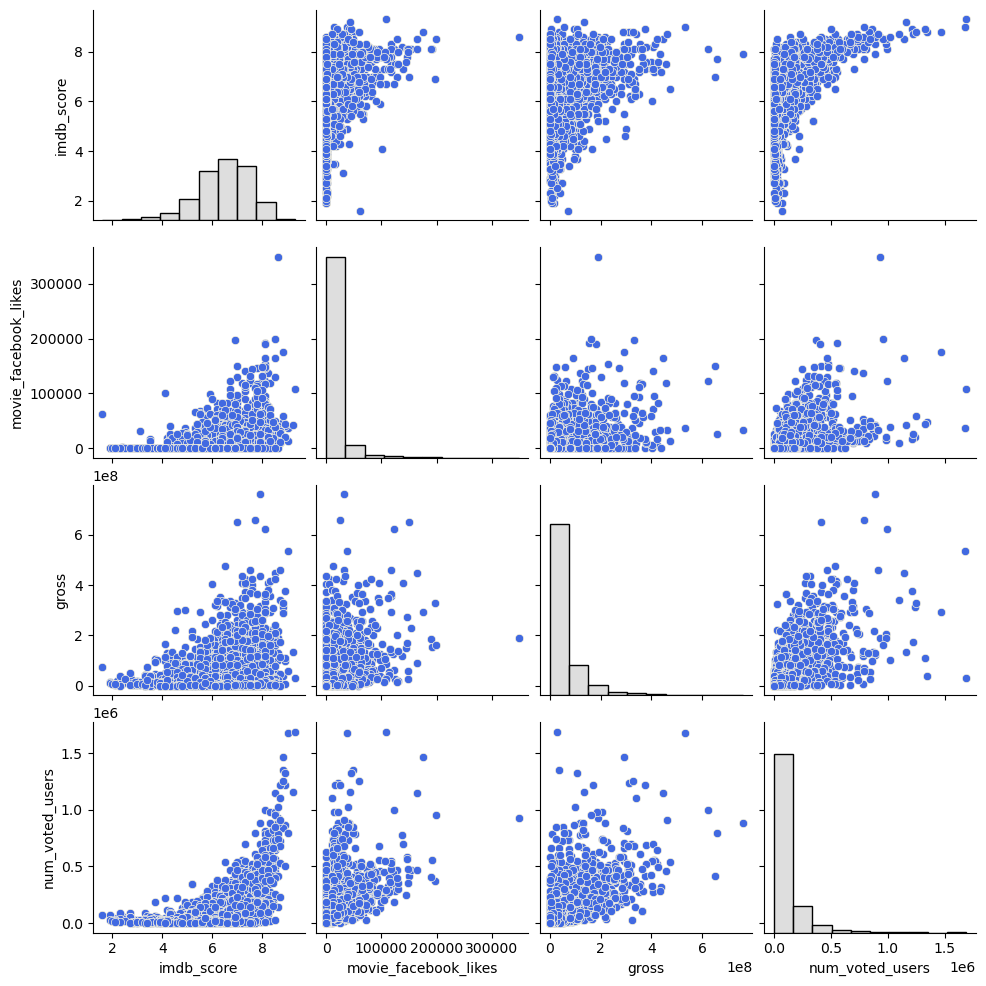

In [96]:
# lets examine the relationship a few random variables 
# cursory glance 
sns.pairplot(data=df, 
             vars=['imdb_score', 'movie_facebook_likes', 'gross', 'num_voted_users'],
             plot_kws={'color': 'royalblue', 'edgecolor': 'cornsilk'},
             diag_kws={'color': 'lightgray', 'bins':10});

- IMDB score shows an increasing trend with number of people who voted for the movie, gross earning and number of facebook likes in the movie page
- Likewise, we also see a positive increasing trend between number of people who voted for the movie and the gross income
- The IMDB scores show a slight negative skew   

In [97]:
# Summary statistics for categorical variables 
df.describe(include = 'object')  # include = object performs summary explicity for categorical variables  

color  genres    actor_1_name language country content_rating  \
count    3736    3736            3736     3736    3736           3736   
unique      2      17            1435       33      45             12   
top     Color  Comedy  Robert De Niro  English     USA              R   
freq     3613     985              42     3579    2968           1695   

        title_year  
count         3736  
unique          74  
top           2006  
freq           188

In [98]:
# check unique values in color variable 
df['color'].unique()

array(['Color', ' Black and White'], dtype=object)

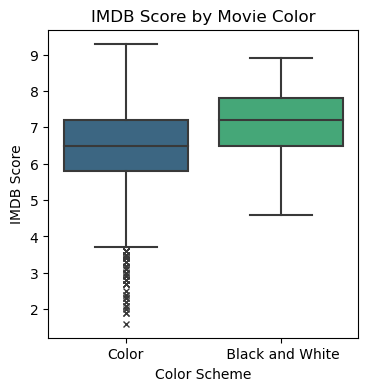

In [99]:
# Visual observations for boxplots 
# Color Scheme 
plt.figure(figsize=(4, 4)) 
sns.boxplot(data=df, x="color", y="imdb_score",
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"linewidth": 1.5},
            palette="viridis")  
plt.title('IMDB Score by Movie Color') 
plt.xticks(rotation=0)
plt.xlabel('Color Scheme')
plt.ylabel('IMDB Score')
plt.show() 

In [100]:
# check unique values in rating variable 
df['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

- We will change "GP" to "PG" as GP is an outdated term
- "X" will be change to "NC-17" as the former is outdated and repalced by the latter one
- "Not Rated" and "Unrated" will be standarized to "Unrated"
- "Approved" and "Passed" will be standarized to "Approved"

In [101]:
# replace the and standarize  
df['content_rating'] = df['content_rating'].replace({'GP': 'PG', 'X': 'NC-17', 'Not Rated': 'Unrated', 'Passed': 'Approved'})
df['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'Unrated', 'M'],
      dtype=object)

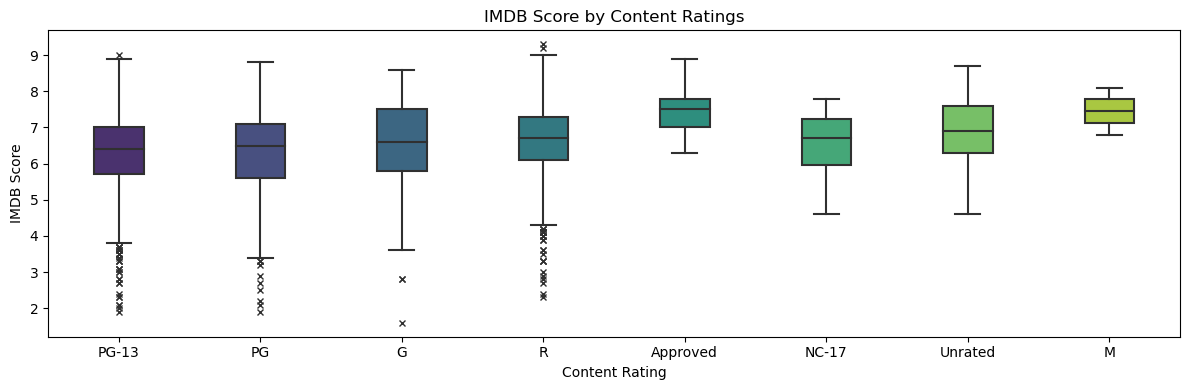

In [102]:
# Visual observations for boxplots 
# Ratings  
plt.figure(figsize=(12, 4)) 
sns.boxplot(data=df, x="content_rating", y="imdb_score",
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"linewidth": 1.5},
            palette="viridis", width = 0.35)  
plt.title('IMDB Score by Content Ratings') 
plt.xticks(rotation=0)
plt.xlabel('Content Rating')
plt.ylabel('IMDB Score')
plt.tight_layout()
plt.show() 

In [103]:
# check unique genres 
df['genres'].unique()

array(['Action', 'Adventure', 'Drama', 'Animation', 'Comedy', 'Mystery',
       'Crime', 'Biography', 'Fantasy', 'Documentary', 'Sci-Fi', 'Horror',
       'Romance', 'Family', 'Western', 'Musical', 'Thriller'],
      dtype=object)

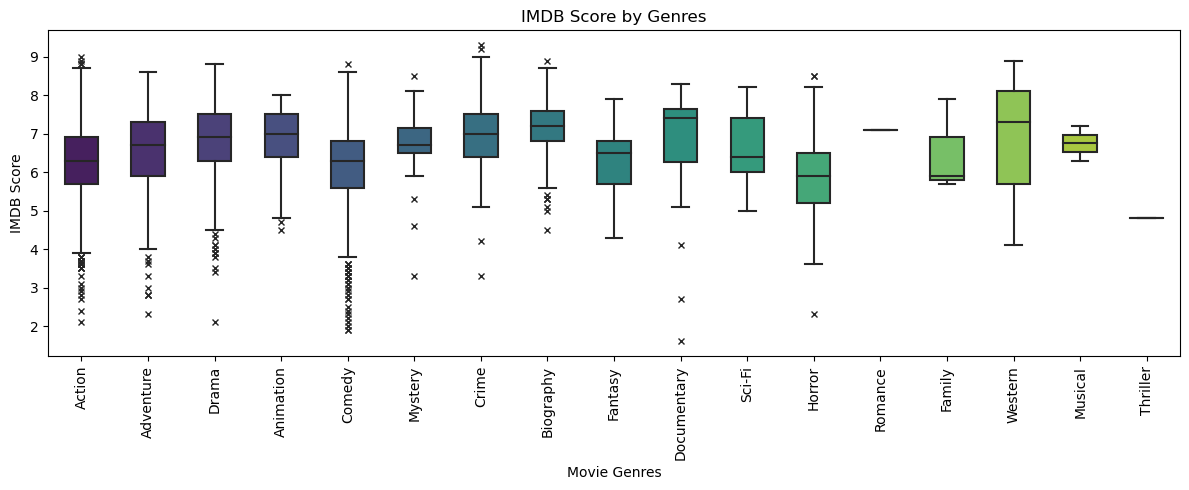

In [104]:
# Visual observations for boxplots 
# Genres 
plt.figure(figsize=(12, 5)) 
sns.boxplot(data=df, x="genres", y="imdb_score",
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"linewidth": 1.5},
            palette="viridis", width = 0.50)  
plt.title('IMDB Score by Genres') 
plt.xticks(rotation=90)
plt.xlabel('Movie Genres')
plt.ylabel('IMDB Score')
plt.tight_layout()
plt.show() 

In [105]:
#Check unique values for 
df['language'].unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Cantonese', 'Japanese', 'Aramaic',
       'Italian', 'Dutch', 'Dari', 'German', 'Mongolian', 'Thai',
       'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Danish', 'Portuguese',
       'Norwegian', 'Czech', 'Russian', 'Zulu', 'Hebrew', 'Arabic',
       'Vietnamese', 'Indonesian', 'Romanian', 'Persian'], dtype=object)

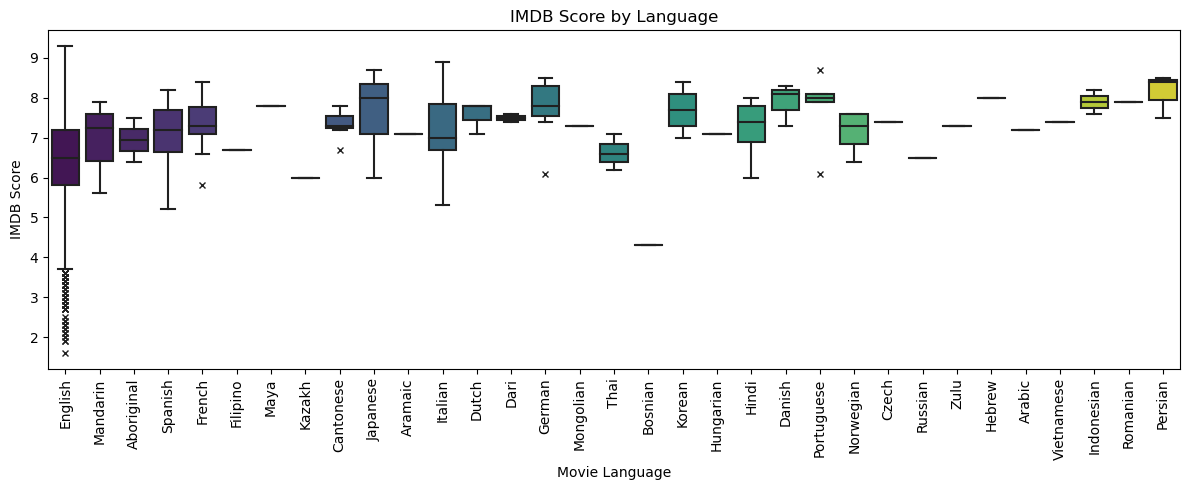

In [106]:
# Visual observations for boxplots 
# Language 
plt.figure(figsize=(12, 5)) 
sns.boxplot(data=df, x="language", y="imdb_score",
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"linewidth": 1.5},
            palette="viridis")  
plt.title('IMDB Score by Language') 
plt.xticks(rotation=90)
plt.xlabel('Movie Language')
plt.ylabel('IMDB Score')
plt.tight_layout()
plt.show() 

In [107]:
#Check unique values for 
df['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'Aruba', 'Denmark',
       'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
       'Netherlands', 'Hungary', 'Russia', 'Mexico', 'Belgium', 'Greece',
       'Taiwan', 'Official site', 'Thailand', 'Iran', 'West Germany',
       'Georgia', 'India', 'Brazil', 'Finland', 'Norway', 'Iceland',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan'], dtype=object)

In [108]:
# lets look what movie "Official site" county name is associated with 
df[df['country']=='Official site']

color  num_critic_for_reviews  duration  director_facebook_likes  \
2675  Color                   135.0     117.0                     19.0   

      actor_3_facebook_likes  actor_1_facebook_likes       gross genres  \
2675                   461.0                  3000.0  20218921.0  Drama   

          actor_1_name  num_voted_users  ...  num_user_for_reviews  language  \
2675  Leighton Meester            14814  ...                 114.0   English   

            country content_rating      budget title_year  \
2675  Official site          PG-13  15000000.0       2010   

      actor_2_facebook_likes imdb_score  aspect_ratio  movie_facebook_likes  
2675                   646.0        6.3          2.35                     0  

[1 rows x 22 columns]

In [109]:
# Upon research on the internet we find that the country of origin for the movie is "USA"
# merge Germany and "West Germany"
# New Line, is not a country name, the movie's country of origin is "USA". We have option to either drop that row or update, we chose to update
df['country'] = df['country'].replace('Official site', 'USA')
df['country'] = df['country'].replace('West Germany', 'Germany')
df['country'] = df['country'].replace('New Line', 'USA')

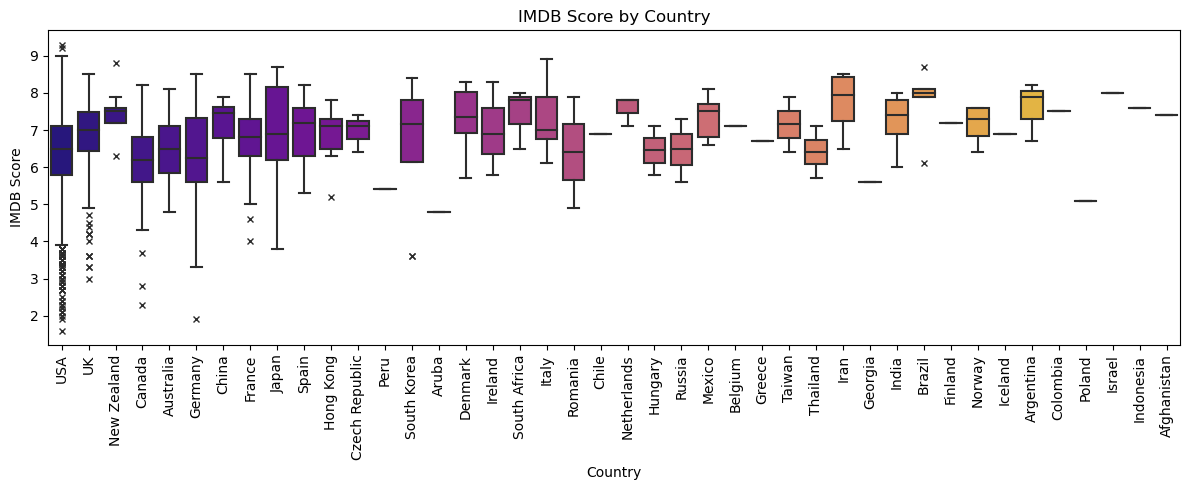

In [110]:
# Visual observations for boxplots 
# Language 
plt.figure(figsize=(12, 5)) 
sns.boxplot(data=df, x="country", y="imdb_score",
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"linewidth": 1.5},
            palette="plasma")  
plt.title('IMDB Score by Country') 
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('IMDB Score')
plt.tight_layout()
plt.show() 

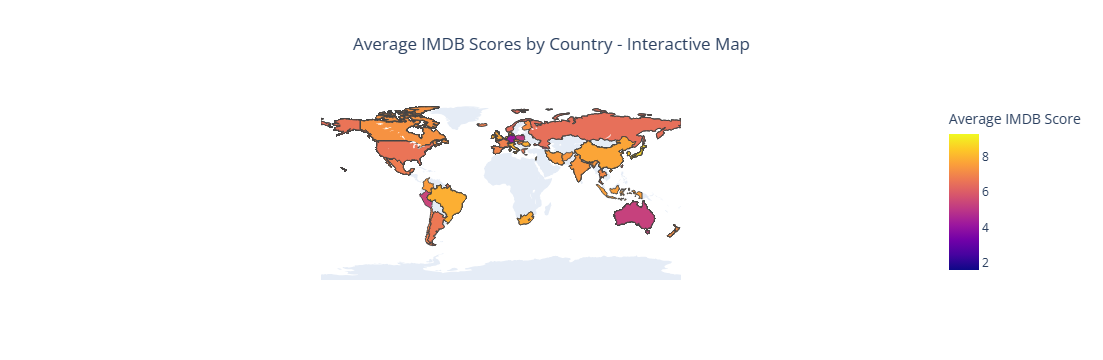

In [111]:
# Lets have some fun with interactive map for these scores 
fig = px.choropleth(
    df,  
    locations="country",  
    locationmode='country names',  
    color="imdb_score",  
    hover_name="country",  
    hover_data={"imdb_score": ":.2f", "country": False},  
    color_continuous_scale=px.colors.sequential.Plasma,  
    labels={"imdb_score": "Average IMDB Score"},  
    title="Average IMDB Scores by Country - Interactive Map"  
)

# Updating the layout for better graphics
fig.update_layout(
    geo=dict(showframe=False,  
        showcoastlines=False,  
        projection_type='equirectangular'),
    title=dict(x=0.5))
fig.show()

##### Perform correlation analysis and discuss the results. Again, what variables are correlated to imdb_score? How are some key variables correlated to each other?

- We will make another data frame with numerical variables only to calcualte Pearson correlation coefficients along with *p-values*

In [112]:
# retain numeric value only for correlation analysis 

df_corr = df[df.select_dtypes(include=[np.number]).columns]

# Initialize a dictionary to hold correlation coefficients and p-values
corr_p_values = {}

# Iterate over the columns in numeric_df except 'IMDB score'
for col in df_corr.columns.drop('imdb_score'):
    # Calculate correlation and p-value between each column and 'IMDB Score'
    corr_coeff, p_val = pearsonr(df_corr[col], df_corr['imdb_score'])
    
    # Store the results in the dictionary
    corr_p_values[col] = {'Correlation': corr_coeff, 'P-value': p_val}

# Convert the dictionary to a DataFrame for nicer display
corr_p_values_df = pd.DataFrame(corr_p_values).T

# Print DataFrame
print(corr_p_values_df.sort_values(by='Correlation', ascending=False))

                           Correlation        P-value
num_voted_users               0.482262  6.196763e-217
duration                      0.368828  9.719199e-121
num_critic_for_reviews        0.350073  3.683308e-108
num_user_for_reviews          0.325353   7.614025e-93
movie_facebook_likes          0.283907   3.322539e-70
gross                         0.216230   8.975786e-41
director_facebook_likes       0.193069   1.059842e-32
cast_total_facebook_likes     0.106200   7.643290e-11
actor_2_facebook_likes        0.100837   6.528418e-10
actor_1_facebook_likes        0.093575   1.003018e-08
actor_3_facebook_likes        0.064805   7.372502e-05
aspect_ratio                  0.030992   5.820702e-02
budget                        0.029799   6.858033e-02
facenumber_in_poster         -0.067847   3.319243e-05


##### Correlation Visualization

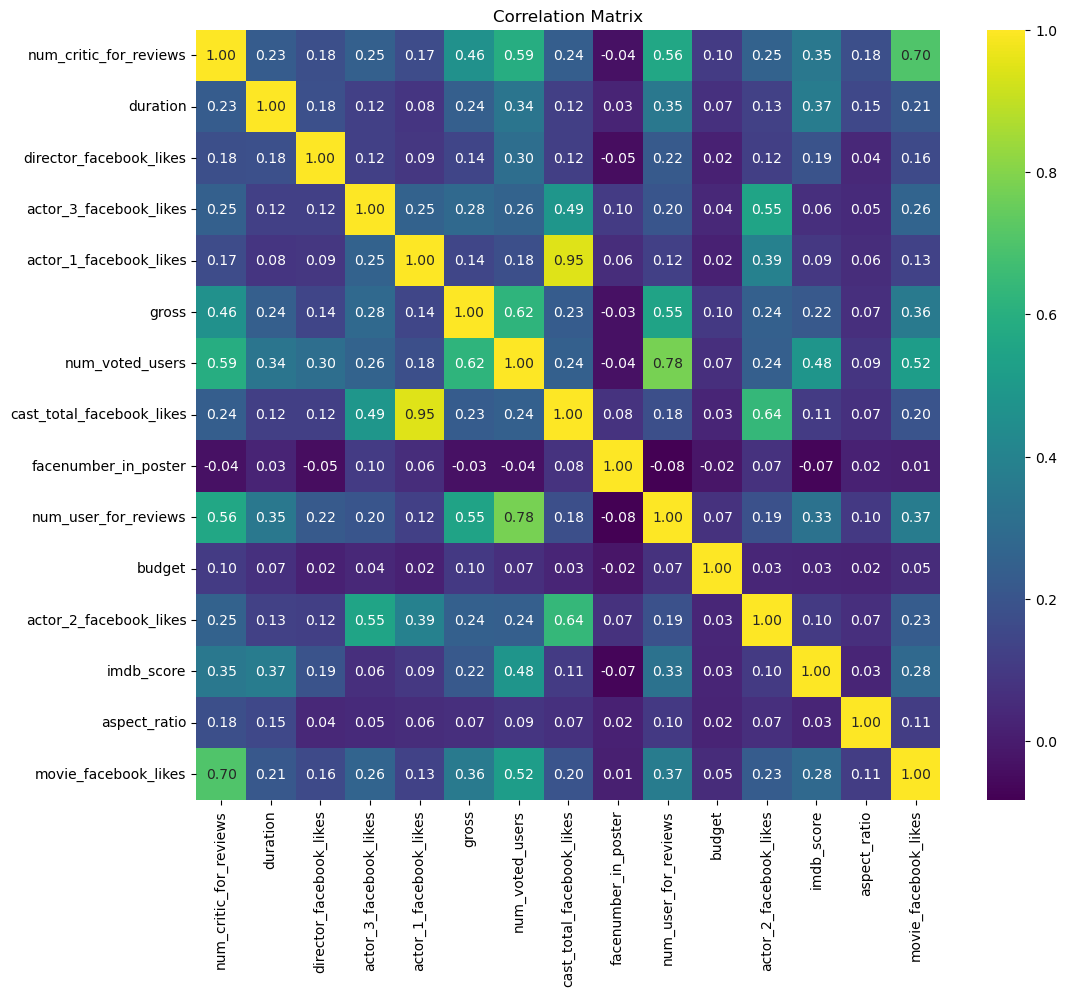

In [113]:
# correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), cmap = 'viridis', annot = True, fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

- **Number of people who voted for the movie** (num_voted_users), **Duration in minutes** (duration), **Number of critical reviews on imdb** (num_critic_for_reviews) are the top three variables that are **strongly, positively and significantly correlated** with IMDB scores.
- **Number of the actor who featured in the movie poster** (facenumber_in_poster) is **negatively and weakly correlated** (-0.067847) with IMDB scores. However, the correlation is significant at 95 % confidence level.
- Number of people who voted for the movie (num_voted_users) and Number of users who gave a review (num_user_for_review) are strongly correlated (0.78) with each other.
- Total number of facebook likes of the entire cast of the movie (cast_total_facebook_likes) is highly correlated with number of likes of the Actor_1 on his/her Facebook Page (actor_1_facebook_likes) and number of likes of the Actor_2 on his/her Facebook Page (actor_2_facebook_likes).
- Number of Facebook likes in the movie page (movie_facebook_likes) is highly correlated with number of critical reviews on imdb (num_critic_for_reviews)
- **Gross income** (gross) is **positively correlated** with **number of users who voted** (num_voted_users) and **number of users who gave reviews** (num_user_for_review).

#### Part II -- Regression

##### Build regression models using at least three regression algorithms, including Lasso. The Y value is imdb_score. You must use model validation in your models.

- For all machine learning approaches henceforth, we will drop 'actor_1_name', 'language', title_year, and 'country'. They have too many unique values which introduced sparsity in model introduces noise and hurts predictive capability of our model.
- 'cast_total_facebook_likes' is highly correlated with facebook like of actors 1, 2, and 3's facebook like. So We will use only 'cast_total_facebook_likes' instead of the other three.
- 'num_user_for_reviews' and 'num_voted_users' are highly correlated, we wil retain number of people who voted for the movie

In [114]:
df = df.drop(['actor_1_name', 'language', 'country', 'title_year', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
             'actor_3_facebook_likes', 'num_user_for_reviews'], axis = 1)

##### Data Splitting (Training Sets, Testing Sets, Encoding and Standarization)

Split the dataset into training and validation sets. Ensure that both sets are representa-tive of the overall dataset.

In [115]:
# Set X features and y variable
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']

In [116]:
# Splitting the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2615, 13), (1121, 13), (2615,), (1121,))

In [117]:
# Define numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['imdb_score']).columns
cat_cols = df.select_dtypes(include=[object]).columns   

print(num_cols, cat_cols)
# this approach is fast

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object') Index(['color', 'genres', 'content_rating'], dtype='object')


In [118]:
X_train[num_cols].head(2)

num_critic_for_reviews  duration  director_facebook_likes        gross  \
2011                   336.0     138.0                      0.0   16969390.0   
240                    320.0     136.0                      0.0  474544677.0   

      num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
2011            80861                      27797                   4.0   
240            534658                      37723                   1.0   

           budget  aspect_ratio  movie_facebook_likes  
2011   25000000.0          2.35                 24000  
240   115000000.0          2.35                 13000

- The features/predictors have different units or scales. For instance gross income and budget are in millions whereas duration is in hundreds. Hence, to make them comparable, we will standarize the data

##### Standarize Numerical Column

In [119]:
# Numerical Columns 
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

# Categorical Columns
X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

In [120]:
# Standarize the predictors 
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [121]:
# Check after standarization 
pd.DataFrame(X_train_num_scaled).head(2)

0         1         2         3         4         5         6  \
0  1.37656  1.178109 -0.269237 -0.501025 -0.169163  1.059052  1.272600   
1  1.24721  1.092317 -0.269237  5.864428  2.741166  1.692473 -0.178497   

          7         8         9  
0 -0.088192  0.619969  0.661675  
1  0.250228  0.619969  0.164843

In [122]:
# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

##### Combine the numerical and categorical columns

Combine the preprocessed numerical and categorical columns back into a single dataset for both training and testing sets.

In [123]:
# Convert the scaled numerical features back to a DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

# Convert the encoded categorical features back to a DataFrame
# Get the new column names from the OneHotEncoder
cat_cols_encoded = encoder.get_feature_names_out(cat_cols)
X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=cat_cols_encoded, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=cat_cols_encoded, index=X_test.index)

In [124]:
# Check the encoded categorical columns 
cat_cols_encoded 

array(['color_Color', 'genres_Adventure', 'genres_Animation',
       'genres_Biography', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family',
       'genres_Fantasy', 'genres_Horror', 'genres_Musical',
       'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_Western', 'content_rating_G',
       'content_rating_M', 'content_rating_NC-17', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R',
       'content_rating_Unrated'], dtype=object)

In [125]:
# Concatenate the numerical and categorical DataFrames
X_train_preprocessed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_preprocessed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [126]:
# Check the concat training data 
X_train_preprocessed.head(2)

num_critic_for_reviews  duration  director_facebook_likes     gross  \
2011                 1.37656  1.178109                -0.269237 -0.501025   
240                  1.24721  1.092317                -0.269237  5.864428   

      num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
2011        -0.169163                   1.059052              1.272600   
240          2.741166                   1.692473             -0.178497   

        budget  aspect_ratio  movie_facebook_likes  ...  genres_Sci-Fi  \
2011 -0.088192      0.619969              0.661675  ...            0.0   
240   0.250228      0.619969              0.164843  ...            0.0   

      genres_Thriller  genres_Western  content_rating_G  content_rating_M  \
2011              0.0             0.0               0.0               0.0   
240               0.0             0.0               0.0               0.0   

      content_rating_NC-17  content_rating_PG  content_rating_PG-13  \
2011                   0.0                0.0                   0.0   
240                    0.0                1.0                   0.0   

      content_rating_R  content_rating_Unrated  
2011               1.0                     0.0  
240                0.0                     0.0  

[2 rows x 34 columns]

In [127]:
X_test_preprocessed.head(2)

num_critic_for_reviews  duration  director_facebook_likes     gross  \
2994                2.451778 -0.494839                -0.269237 -0.713410   
1493               -0.434335 -0.366151                -0.193720 -0.630534   

      num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
2994        -0.145056                  -0.391001              1.272600   
1493        -0.591792                   0.189135             -0.178497   

        budget  aspect_ratio  movie_facebook_likes  ...  genres_Sci-Fi  \
2994 -0.137075      0.619969              0.797175  ...            0.0   
1493 -0.039309     -0.689451             -0.390526  ...            0.0   

      genres_Thriller  genres_Western  content_rating_G  content_rating_M  \
2994              0.0             0.0               0.0               0.0   
1493              0.0             0.0               0.0               0.0   

      content_rating_NC-17  content_rating_PG  content_rating_PG-13  \
2994                   0.0                0.0                   0.0   
1493                   0.0                0.0                   0.0   

      content_rating_R  content_rating_Unrated  
2994               1.0                     0.0  
1493               1.0                     0.0  

[2 rows x 34 columns]

#### Model Building 

We will fit three different types of models: multiple linear regression, random forest and LASSO

##### 1. Multiple Linear Regression

In [128]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_preprocessed, y_train)

LinearRegression()

In [129]:
# Prediction with the model 
model_linear_regression_y = model_linear_regression.predict(X_test_preprocessed)

In [130]:
# Coefficients
coefficients = pd.DataFrame(model_linear_regression.coef_, index=X_train_preprocessed.columns, columns=['Coefficient'])
#print(coefficients)

In [131]:
pd.DataFrame(list(zip(X.columns, np.transpose(model_linear_regression.coef_)))).round(2)

0     1
0                       color  0.18
1      num_critic_for_reviews  0.20
2                    duration  0.02
3     director_facebook_likes -0.07
4                       gross  0.43
5                      genres -0.03
6             num_voted_users -0.02
7   cast_total_facebook_likes  0.00
8        facenumber_in_poster -0.03
9              content_rating -0.04
10                     budget -0.33
11               aspect_ratio  0.37
12       movie_facebook_likes  0.75

##### 2. Random Forest Regressor

In [132]:
# Model Building 
regr = RandomForestRegressor(random_state = 0)
regr.fit(X_train_preprocessed, y_train)
regr_predicted = regr.predict(X_test_preprocessed)

In [133]:
# Feature Importance 
feature_importances = pd.DataFrame(regr.feature_importances_, index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# top ten important features
feature_importances[0:10]

importance
num_voted_users              0.346502
budget                       0.137406
duration                     0.127399
gross                        0.080746
cast_total_facebook_likes    0.062962
num_critic_for_reviews       0.059804
director_facebook_likes      0.048334
movie_facebook_likes         0.033362
facenumber_in_poster         0.022801
content_rating_PG-13         0.014768

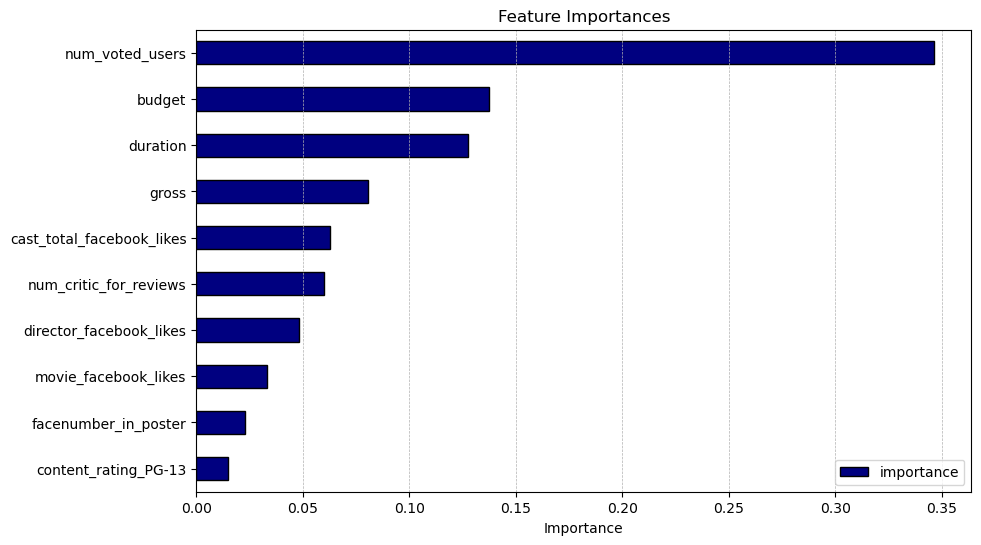

In [134]:
#Create a figure object with a specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Sort values in ascending order 
sorted_features = feature_importances[0:10].sort_values(by='importance', ascending=True)

# Use the axis 'ax' for plotting
sorted_features.plot(kind='barh', color='navy', ax=ax, edgecolor = 'black')

ax.set_xlabel('Importance')  
ax.set_title('Feature Importances')  
ax.grid(axis='x', linestyle='--', linewidth=0.5)  # Add a grid for the x-axis

plt.show()  # Display the plot

##### 3. LASSO Regularization Algorithm

In [135]:
# Fit the model with LASSO regularization  

# Step 1, Initialize the algorithm of choice 
model_LASSO = lm.Lasso(alpha = 0.1)

# step 2. Use fit function --> the most important step 
model_LASSO.fit(X_train_preprocessed, y_train)

Lasso(alpha=0.1)

In [136]:
print('Coefficients: ', model_LASSO.coef_)
print("y-intercept ", model_LASSO.intercept_)

Coefficients:  [ 0.0399398   0.17238591  0.         -0.          0.32104976 -0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.          0.        ]
y-intercept  6.4712810707456985


In [137]:
pd.DataFrame(list(zip(X.columns, np.transpose(model_LASSO.coef_)))).round(4)

0       1
0                       color  0.0399
1      num_critic_for_reviews  0.1724
2                    duration  0.0000
3     director_facebook_likes -0.0000
4                       gross  0.3210
5                      genres -0.0000
6             num_voted_users -0.0000
7   cast_total_facebook_likes  0.0000
8        facenumber_in_poster -0.0000
9              content_rating  0.0000
10                     budget -0.0000
11               aspect_ratio  0.0000
12       movie_facebook_likes  0.0000

In [138]:
# Make predictions with the LASSO model 
model_LASSO_y = model_LASSO.predict(X_test_preprocessed)

#### Model Evaluation 

Use metrics like MSE and R-squared to evaluate the model performance on the test set.

##### 1. Performance Evaluation of of Multiple Linear Regression

In [139]:
print("mean square error: ", mean_squared_error(y_test, model_linear_regression_y))
print("variance or r-squared: ", explained_variance_score(y_test, model_linear_regression_y))

mean square error:  0.6319840176153776
variance or r-squared:  0.4264109484129097


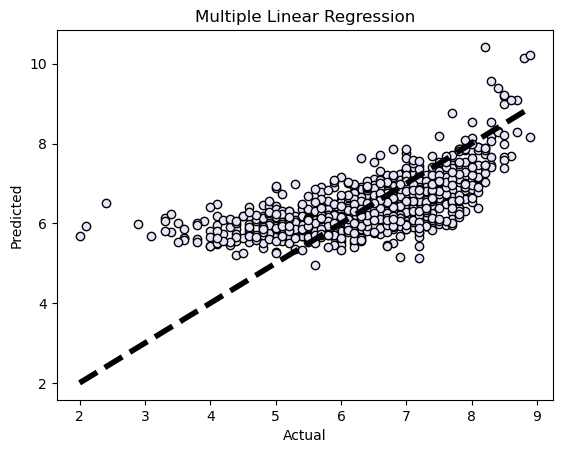

In [140]:
plt.subplots()
plt.scatter(y_test, model_linear_regression_y,
           facecolor = 'lavender', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

##### 2. Performance Evaluation of Random Forest Regressor

In [141]:
print("mean square error: ", mean_squared_error(y_test, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, regr_predicted))

mean square error:  0.5005590704727921
variance or r-squared:  0.5467747833988676


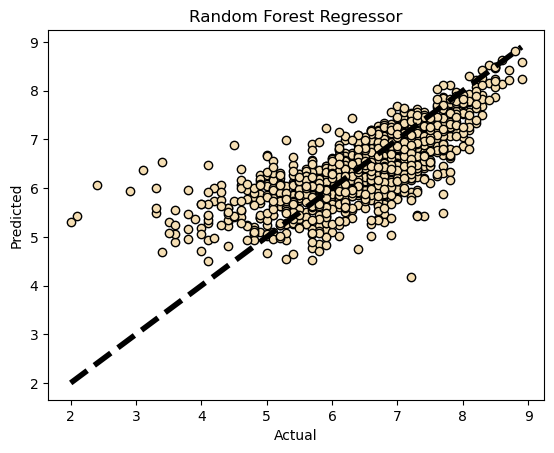

In [142]:
plt.subplots()
plt.scatter(y_test, regr_predicted,
           facecolor = 'wheat', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

##### 3. Performance Evaluation of LASSO

In [143]:
print("mean square error: ", mean_squared_error(y_test, model_LASSO_y))
print("variance or r-squared: ", explained_variance_score(y_test, model_LASSO_y))

mean square error:  0.806882595924433
variance or r-squared:  0.26769111310111715


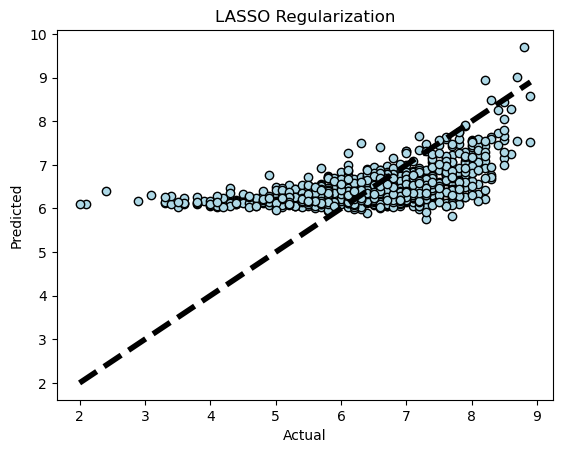

In [144]:
plt.subplots()
plt.scatter(y_test, model_LASSO_y,
           facecolor = 'lightblue', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LASSO Regularization')
plt.show()

##### Model Performance Comparative Table 

<div style="text-align: center;">

#### Table 1: Comparative Performance Metrics of Models 

|Model |Mean Squared Error (MSE) |R-Squared |
|:----:|:-----------------------:|:--------:|
|Multiple Linear Regression |0.6319840176153776 |0.4264109484129097 |
|Random Forest Regressor |0.5005590704727921 |0.5467747833988676 |
|LASSO Regularization |0.806882595924433 |0.26769111310111715 |

##### What is your best model? What is the accuracy?

- From the comparative table above, we can conclude that **Random Forest Regressor** technique performs the best as it has the lowest mean squared error: 0.50 and highest R-squared value: 0.54.
- Multiple Linear regression is the second best model based on these metrics, and LASSO performs has a relatively poor performance for this dataset

*Interpretation*
- Number of people who voted for the movie, budget, duration in minutes and gross income, the top four predictors, all have positive coefficients. It means an increase in features associated with these coefficients will increase the IMDB score.

#### Part III -- Classification

##### The goal is to build a classification model to predict if a movie is good or bad. You need to create a new “categorical” column from imdb_score in order to build classification models. Create the column by “converting” the imdb_score into 2 categories (or classes): “1-5 and 6-10, which represents bad (or 0) and good (or 1), respectively.”

In [145]:
# Create a new column with IMDB score for good and bad ratings 
df['rating_category'] = (df['imdb_score'] >= 6).astype(int)
df.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color                   723.0     178.0                      0.0   
1  Color                   302.0     169.0                    563.0   
2  Color                   602.0     148.0                      0.0   
3  Color                   813.0     164.0                  22000.0   
5  Color                   462.0     132.0                    475.0   

         gross  genres  num_voted_users  cast_total_facebook_likes  \
0  760505847.0  Action           886204                       4834   
1  309404152.0  Action           471220                      48350   
2  200074175.0  Action           275868                      11700   
3  448130642.0  Action          1144337                     106759   
5   73058679.0  Action           212204                       1873   

   facenumber_in_poster content_rating       budget  imdb_score  aspect_ratio  \
0                   0.0          PG-13  237000000.0         7.9          1.78   
1                   0.0          PG-13  300000000.0         7.1          2.35   
2                   1.0          PG-13  245000000.0         6.8          2.35   
3                   0.0          PG-13  250000000.0         8.5          2.35   
5                   1.0          PG-13  263700000.0         6.6          2.35   

   movie_facebook_likes  rating_category  
0                 33000                1  
1                     0                1  
2                 85000                1  
3                164000                1  
5                 24000                1

##### Remove ‘imdb_score’ in X variables since the column imdb_score is basically the same as the newly created binary column.

In [146]:
# remove the imdb_score column 
#IMDB_score = df['imdb_score'] # since we are not creating a new data frame, we will save scores in new variable, just in case we need it for analysis later
df.drop('imdb_score', axis = 1, inplace = True)

##### Not all variables need to be used as X variables, but it is important to include all the relevant variables as X to increase the model accuracy.


- For classification problem, we will proceed with the same variables we deemed important for regression analysis before. 

##### You must use at least three different classification algorithms we have learned and evaluate model quality.

The following classification algorithms will be used to make the predictions: 

    (a) Decision Trees 
    (b) KNN Classification 
    (c) Logistic Regression 
    (d) Random Forest Classifier 

##### (a) Decision Tree

In [147]:
# Declare X and y variables 
y = df['rating_category']
X = df.drop(['rating_category'], axis = 1)

In [148]:
df.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'content_rating',
       'budget', 'aspect_ratio', 'movie_facebook_likes', 'rating_category'],
      dtype='object')

In [149]:
# Define numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['rating_category']).columns
cat_cols = df.select_dtypes(include=[object]).columns   

print(num_cols, cat_cols)
# this approach is fast

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object') Index(['color', 'genres', 'content_rating'], dtype='object')


In [150]:
# split validation
# Splitting the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2615, 13), (1121, 13), (2615,), (1121,))

In [151]:
# Numeric transformer (StandardScaler for feature scaling)
num_transformer = StandardScaler()

# Categorical transformer (OneHotEncoder for one-hot encoding)
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [152]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

In [153]:
# Create a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['color', 'genres', 'content_rating'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [154]:
# Train a decision tree model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['color', 'genres', 'content_rating'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [155]:
#Model evaluation--Decision Tree 
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

0.7546833184656556
--------------------------------------------------------
[[162 136]
 [139 684]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       298
           1       0.83      0.83      0.83       823

    accuracy                           0.75      1121
   macro avg       0.69      0.69      0.69      1121
weighted avg       0.76      0.75      0.76      1121

--------------------------------------------------------
0.6873649359439602


##### (b) KNN Algorithm 

In [156]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['color', 'genres', 'content_rating'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [157]:
#Model evaluation -- KNN Algorithms 
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.7350579839429081
--------------------------------------------------------
[[147 151]
 [146 677]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       298
           1       0.82      0.82      0.82       823

    accuracy                           0.74      1121
   macro avg       0.66      0.66      0.66      1121
weighted avg       0.73      0.74      0.73      1121

--------------------------------------------------------
0.6579444168086963


##### (c) Logistic Regression

In [158]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=500))
])

lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['color', 'genres', 'content_rating'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=500))])

In [159]:
# Accessing model coefficients
coefficients = lr.named_steps['classifier'].coef_

coef_df = pd.DataFrame(list(zip(X_train.columns, np.transpose(coefficients))),
                       columns=['X variables', 'coef']).sort_values('coef', ascending=False)
# access the coefficent from the array
coef_df['coef'] = coef_df['coef'].apply(lambda x: x[0])
print(coef_df)

                  X variables      coef
4                       gross  2.887328
12       movie_facebook_likes  1.159461
11               aspect_ratio  0.892708
1      num_critic_for_reviews  0.741129
2                    duration  0.220576
9              content_rating  0.055789
7   cast_total_facebook_likes  0.020174
0                       color  0.014159
8        facenumber_in_poster  0.008928
5                      genres -0.061231
6             num_voted_users -0.168553
3     director_facebook_likes -0.471857
10                     budget -0.994859


In [160]:
#Model evaluation -- KNN Algorithms 
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7814451382694023
--------------------------------------------------------
[[150 148]
 [ 97 726]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       298
           1       0.83      0.88      0.86       823

    accuracy                           0.78      1121
   macro avg       0.72      0.69      0.70      1121
weighted avg       0.77      0.78      0.77      1121

--------------------------------------------------------
0.6927471111582278


##### (d) Random Forest Classifier

In [161]:
Rc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 100))
])
Rc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['color', 'genres', 'content_rating'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [162]:
#Model evaluation -- KNN Algorithms 
print(metrics.accuracy_score(y_test, Rc.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, Rc.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, Rc.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, Rc.predict(X_test)))

0.8206958073148974
--------------------------------------------------------
[[147 151]
 [ 50 773]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.49      0.59       298
           1       0.84      0.94      0.88       823

    accuracy                           0.82      1121
   macro avg       0.79      0.72      0.74      1121
weighted avg       0.81      0.82      0.81      1121

--------------------------------------------------------
0.716267624585124


##### Comparing Algorithms 

In [163]:
# Define the models with pipelines
models = [
    {
        'label': 'Decision Tree',
        'model': Pipeline([('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])
    },
    {
        'label': 'K-nearest neighbors',
        'model': Pipeline([('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])
    },
    {
        'label': 'Logistic Regression',
        'model': Pipeline([('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='lbfgs', max_iter=500))])
    },
    {
        'label': 'Random Forest',
        'model': Pipeline([('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100))])
    }
]

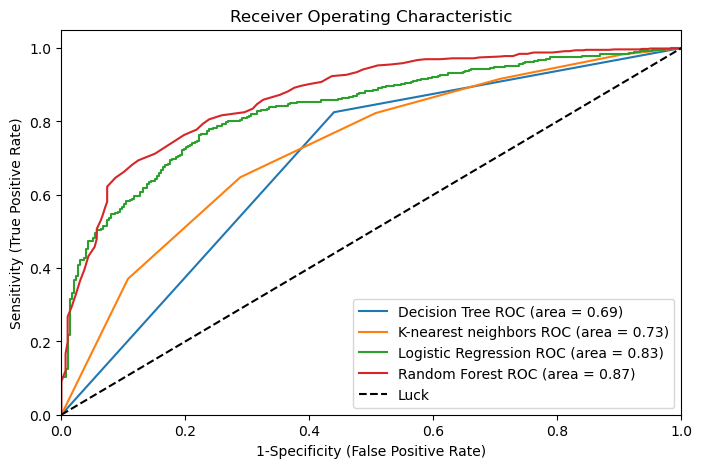

In [164]:
plt.figure(figsize=(8, 5))
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    # Use predict_proba to get the probability estimates for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    # Plot
    plt.plot(fpr, tpr, label=f"{m['label']} ROC (area = {auc:.2f})")

# Plot luck line
plt.plot([0, 1], [0, 1], 'k--', label="Luck")

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##### What is your best classification model? What is the model accuracy? What is the true positive rate? What is the false positive rate? What is the ROC score?

- The best classification model is **Random Forest Classifier**. The model's accuracy is 82 %

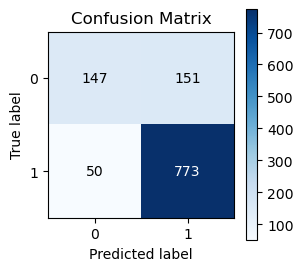

In [165]:
y_pred = Rc.predict(X_test)
# Plotting the confusion matrix
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred, figsize=(3, 3))
plt.show()

$\text{True Positive Rate (Sensitivity)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$

- The true positive rate is $\frac{774}{774 + 49} = $ $0.94$

$\text{False Positive Rate} = \frac{\text{False Positives (FP)}}{\text{True Negatives (TN)} + \text{False Positives (FP)}}
$

- The false positive rate is $\frac{155}{155+143} = $ $0.52$

- The ROC socre of the the Random Forest Classifier is: **AUC** = 0.87. 

#### Part III -- Clustering

##### Analyze the data using the K-means algorithm. Use the Elbow method to determine the optimal K value for K-means analysis..

In [166]:
# Exclude rating_category/response from the dataframe for cluster analysis 
# We will also exclude categorical variable and use only numerical variables for clustering
df.drop(['rating_category', 'color', 'genres', 'content_rating'], axis =1, inplace = True)

In [167]:
# Homogenity of variance test 
pd.set_option('display.float_format', '{:.2f}'.format)
df.var()

num_critic_for_reviews                  15238.30
duration                                  513.74
director_facebook_likes               9434872.45
gross                        4864522677394771.00
num_voted_users                   22930215475.16
cast_total_facebook_likes           364391055.22
facenumber_in_poster                        4.18
budget                      51333371753863848.00
aspect_ratio                                0.13
movie_facebook_likes                457775120.68
dtype: float64

The scale of variables differes to an extent that it can impact our analysis. Hence we will normalize the data before further analysis.

In [168]:
# Normalize the data
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

num_critic_for_reviews  duration  director_facebook_likes  gross  \
0                    0.69      0.23                    -0.04   0.93   
1                    0.17      0.20                    -0.01   0.34   
2                    0.54      0.13                    -0.04   0.19   
3                    0.80      0.18                     0.92   0.52   
5                    0.36      0.07                    -0.01   0.03   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  budget  \
0             0.46                      -0.01                 -0.03    0.02   
1             0.22                       0.06                 -0.03    0.02   
2             0.10                       0.00                 -0.01    0.02   
3             0.61                       0.15                 -0.03    0.02   
5             0.06                      -0.01                 -0.01    0.02   

   aspect_ratio  movie_facebook_likes  
0         -0.02                  0.07  
1          0.02                 -0.03  
2          0.02                  0.22  
3          0.02                  0.44  
5          0.02                  0.04

In [169]:
# Check variance again 
df_norm.var()

num_critic_for_reviews      0.02
duration                    0.01
director_facebook_likes     0.02
gross                       0.01
num_voted_users             0.01
cast_total_facebook_likes   0.00
facenumber_in_poster        0.00
budget                      0.00
aspect_ratio                0.00
movie_facebook_likes        0.00
dtype: float64

##### Optimal value of 'k' -- Elbow Method

##### The "Elbow" Method

The idea of the Elbow method is to run k-means clustering for a range of cluster numbers 
*k* and for each value, calculate the **sum of squared distances** from each point to its assigned cluster center, also known as **inertia**.

The inertia tends to **decrease toward 0 as *k* increases** because more clusters mean that points are closer to their assigned centers. 

However, at some point, the benefit of increasing *k* diminishes. The "elbow" usually represents a point where adding more clusters doesn't provide much better fit to the data. This point is considered as a reasonable choice for *k*.

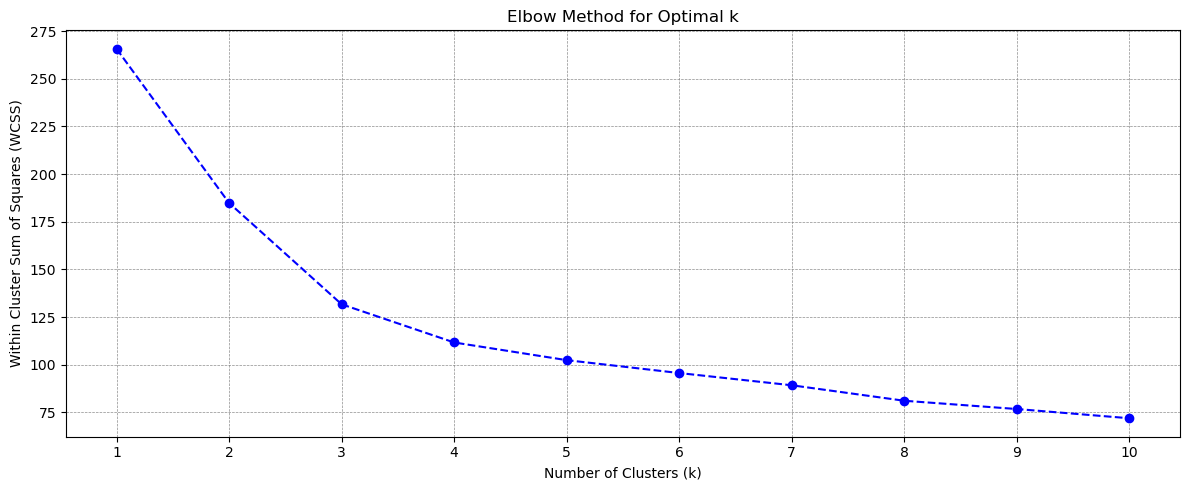

In [170]:
# Optimal value for k using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    n_init="auto",  
                    random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(12, 5)) 
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.9) 
plt.xticks(range(1, 11))  

plt.tight_layout()
plt.show()

- From the 'elbow plot', 3 appears to be the optimal value for k. 

In [171]:
# clustering analysis using k-means
#three clusters
k_means = KMeans(init='k-means++', 
                 n_init='auto',
                 n_clusters=3, 
                 random_state=0)

In [172]:
# fit the model 
k_means.fit(df_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [173]:
# cluster labels
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [174]:
# find out cluster centers
k_means.cluster_centers_

array([[-0.06216094, -0.01136572, -0.02870287, -0.02384593, -0.03004446,
        -0.00307823,  0.00112355, -0.00092119, -0.00154078, -0.01847777],
       [ 0.21993914,  0.03234811, -0.02344215,  0.08129794,  0.09385667,
         0.00884425, -0.00229821,  0.00345134,  0.00551364,  0.06416564],
       [ 0.09919008,  0.05336579,  0.60561374,  0.05181885,  0.10368728,
         0.01408032, -0.00930407,  0.0006102 ,  0.00218087,  0.03491648]])

In [175]:
# convert cluster lables to dataframe
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])

In [176]:
# add cluster labels to the original data frame
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

num_critic_for_reviews  duration  director_facebook_likes        gross  \
0                  723.00    178.00                     0.00 760505847.00   
1                  302.00    169.00                   563.00 309404152.00   
2                  602.00    148.00                     0.00 200074175.00   
3                  813.00    164.00                 22000.00 448130642.00   
4                  462.00    132.00                   475.00  73058679.00   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                  0.00   
1           471220                      48350                  0.00   
2           275868                      11700                  1.00   
3          1144337                     106759                  0.00   
4           212204                       1873                  1.00   

        budget  aspect_ratio  movie_facebook_likes  cluster  
0 237000000.00          1.78                 33000        1  
1 300000000.00          2.35                     0        1  
2 245000000.00          2.35                 85000        1  
3 250000000.00          2.35                164000        2  
4 263700000.00          2.35                 24000        1

In [177]:
# Number of observations in each cluster 
df2.groupby('cluster').size()

cluster
0    2842
1     731
2     163
dtype: int64

- There are 2842 observations in cluster-0, 731 observations in cluster-1, and 163 observations in cluster-2

##### Cluster Profiling 

##### This is exploratory data analysis, and you need to report the movie (or cluster) “profiles” based on clustering analysis.

In [178]:
df2.groupby('cluster').mean()

num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                              
0                        116.02    106.89                   146.82   
1                        344.88    119.71                   268.11   
2                        247.06    125.87                 14736.20   

               gross  num_voted_users  cast_total_facebook_likes  \
cluster                                                            
0        34180946.88         54301.14                    9430.31   
1       113975416.03        263963.81                   17292.55   
2        91712437.37        280393.60                   20707.66   

         facenumber_in_poster      budget  aspect_ratio  movie_facebook_likes  
cluster                                                                        
0                        1.42 34839603.95          2.09               2804.14  
1                        1.27 88169086.18          2.19              31700.41  
2                        0.98 53544219.74          2.14              21457.80

**Cluster 0**
- Relatively shorter duration movies made with lower budget, possibly less popular independent films.
  
**Cluster 1**
- Movies with relatively more critical reviews, high budget, high revenues and popular on facebook.
  
**Cluster 2**
- Movies made by famous directors, high social media engagements with moderate budgets and revenues. These movies are also characterized by longest durations.

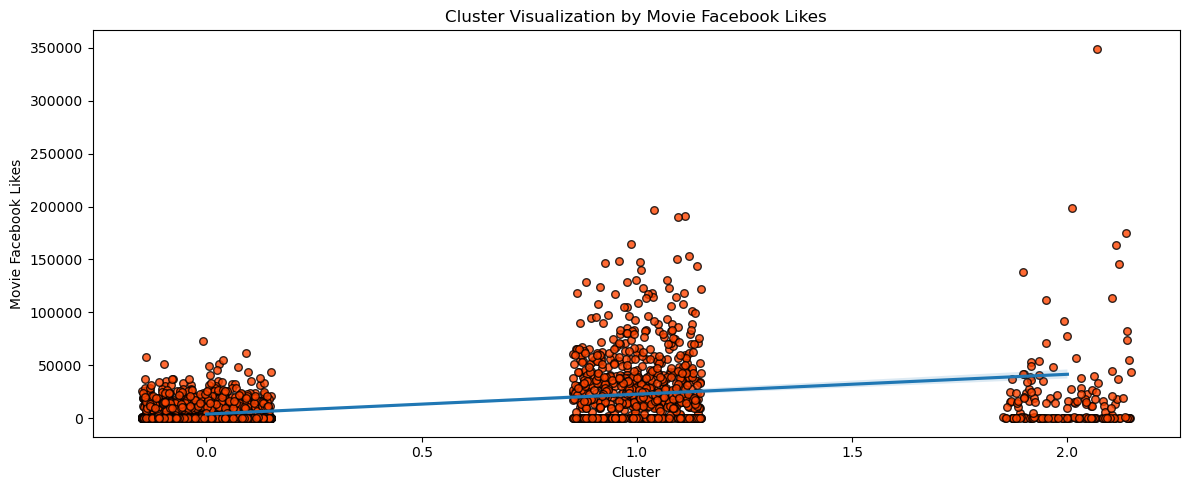

In [179]:
# cluster visualizatoin by revenues # an example 
plt.figure(figsize=(12, 5)) 

ax = sns.regplot(x='cluster', 
                 y='movie_facebook_likes', 
                 data=df2, 
                 x_jitter=.15, 
                 y_jitter=.15,
                 scatter_kws={'s': 30, 'edgecolor': 'black', 'linewidth': 1, 'color': 'orangered'})  # scatter_kws to adjust point aesthetics

plt.title('Cluster Visualization by Movie Facebook Likes')
plt.xlabel('Cluster')
plt.ylabel('Movie Facebook Likes')

# Adding a box around the plot
plt.box(on=True)
plt.tight_layout()
plt.show()

- This shows that movie's popularity on social media is an important factor

#### Part IV -- Storytelling

##### In the end, this is what your client is interested in. Develop useful insights from your correlation analysis and machine learning models (regression, classification, and clustering). Write a summary using bulleted lists and/or numbers in markdown cells.


##### Comments/Conclusions on Correlation Analysis: 

- Number of people who voted for the movie (num_voted_users), Duration in minutes (duration), Number of critical reviews on imdb (num_critic_for_reviews) are the top three variables that are strongly, positively and significantly correlated with IMDB scores.
  
- Number of users who left reviews (num_user_for_reviews), number of facebook likes on movie page (movie_facebook_likes), movie's revenue (gross), and number of likes of director's facebook page (director_facebook_like) are moderately but significantly correlated with IMDB scores.
  
- Number of actor who featured in movie poster is the only variable negatively correlated (weak) with IMDB scores. Eventhough weak, the correlation is significant at 95% confidence level.

- Number of people who voted for the movie (num_voted_users) and Number of users who gave a review (num_user_for_review) are strongly correlated with each other. 
- Total number of facebook likes of the entire cast of the movie (cast_total_facebook_likes) is highly correlated with number of likes of the Actor_1 on his/her Facebook Page (actor_1_facebook_likes) and number of likes of the Actor_2 on his/her Facebook Page (actor_2_facebook_likes
 - 
Number of Facebook likes in the movie page (movie_facebook_likes) is highly correlated with number of critical reviews on imdb (num_critic_for_revie-
 )
- 
Gross income (gross) is positively correlated with number of users who voted (num_voted_users) and number of users who gave reviews (num_user_for_review).

##### Comments/Conclusions from Regression Models: 

- Movie colorization, number of critical reviews on imdb, movie duration, popularity of movie director and cast on facebook, revenue and movie's popularity on facebook positively influence the IMDB score (regression analysis). Movie's popularity on facebook (number of likes on movie's facebook page) has the strongest influence on score. 

- The most important 10 features in descending order for predicting IMDB scores are:
    1. number of users who voted on imdb
    2. budget of movie in dollar
    3. duration in minutes
    4. gross earnings in dollar
    5. total number of facebook likes of the entire cast of the movie
    6. number of critical reviews on imdb
    7. number of likes on facebook page of director
    8. number of likes of movie's facebook page
    9. number of the actor who featured in the movie poster
    10. Content rating of the movie (PG-13)

- For this dataset, Random forest has the best predictive capability

##### Comments/Conclusions from Classification Models: 

- The results of logistic regression shows that higher gorss, movie_facebook_likes, aspect_ratio, num_critic_for_reviews and duration will likely result in classification of movie as good.

-  Content_rating, cast_total_facebook_likes, color, facenumber_in_poster have no or minimal influence on the rating of moive

-  Higher values for num_voted_users, genres, director_facebook_likes may increase the likelihood of movie being classified as bad. For genres, the small negative coefficient indicates that certain genres might slightly decrease the likelihood of movie being classified as good. The most substantial negative coefficient on a movie is of budget.

-  Random forest classification has the highest classification accuracy (82%) among four classification models tested. It has a true positive rate of 0.94, which means 94% of actual good movies were correctly identified as good. However, 52% of actual bad movies were also incorrectly idnetified as good by the model.  

##### Comments/Conclusions from K-Means Clustering:

- Cluster analyis identified three distinct clusters in the movie dataset. The first cluster is characterized by relatively shorter duration, lower budget, and are likely less popular independent films. Second cluster is characterized by more critical reviews, both high budget and higher revenues, and are more popular in facebook. The third cluster has movied directed by popular directors, tend to be longer in duration and have high social media engagements.

- For first cluster movies, marketing team should focus on niche market used targeted marketing for audiences who appreciate shorter and independent movies, most likely movies that are less commercial and more artistic.

- Second cluster movies are high budget and with critical acclaim and popularity. Makers can consider introducing sequels to cash the popularity of prequels.

- Third cluster movies utilize the popularity of movie directors. Producers can leverage this fame for engaging more audience.  